# 1. Import required libraries

In [ ]:

import numpy as np
import pandas as pd


# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
import plotly.express as px
from mpl_toolkits import mplot3d


import warnings
warnings.filterwarnings('ignore')


## 2. EDA

# 2.1 Load data

In [ ]:
# Đọc dữ liệu từ URL và đặt tên cho các cột
url = 'https://drive.google.com/file/d/1WVzv_qWKTprwUyMrNn91ImB3eg4DYa6v/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]

# Đọc dữ liệu với cột đầu tiên làm header
df = pd.read_csv(url, header=None)

# Lấy tên cột từ dòng đầu tiên của dữ liệu
column_names = df.iloc[0]

# Đặt tên cho các cột
df.columns = column_names
# Loại bỏ dòng đầu tiên từ DataFrame
df = df[1:]

# Đặt lại chỉ số của DataFrame
df.reset_index(drop=True, inplace=True)
# Chuyển đổi các cột sang kiểu dữ liệu phù hợp
df = df.apply(pd.to_numeric, errors='ignore')
# Hiển thị 10 dòng đầu tiên của DataFrame
df.head(10)



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


### 2.2 Inspect data set

In [ ]:
# Nhận biết thông tin từ DataFrame
df.shape

(167, 10)

Bộ dữ liệu có 167 dòng với 10 thuộc tính

In [ ]:
# Kiểm tra kiểu giữ liệu và các thông tin
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


- Dữ liệu có  167 dòng và 10 cột.
- Gồm 1 cột có kiểu dữ liệu object, 7 cột float, 2 cột int
- Gồm 1 categorical và 9 numerical

In [ ]:
# Descriptive Statistics
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Bộ dữ liệu này cung cấp thông tin về các chỉ số kinh tế và xã hội của 167 quốc gia, bao gồm tỷ lệ tử vong trẻ em, xuất khẩu, chi tiêu y tế, nhập khẩu, thu nhập bình quân đầu người, lạm phát, tuổi thọ trung bình, tổng tỷ suất sinh và GDP bình quân đầu người.

Dưới đây là đánh giá chi tiết từng cột trong bảng thống kê mô tả các chỉ số kinh tế - xã hội của 167 quốc gia:

**Tỷ lệ tử vong trẻ em (child_mort):**
- Trung bình: 38.27 ca tử vong trên 1.000 trẻ sinh ra.
- Min: 2.6, Max: 208, cho thấy khoảng dao động rộng.
- Độ lệch chuẩn: 40.33, cho thấy sự biến động lớn giữa các quốc gia.
- Trung vị (50%): 19.30, cho thấy một nửa số quốc gia có tỷ lệ tử vong trẻ em dưới giá trị này.
- Phần tư đầu tiên (25%) và phần tư thứ ba (75%): 8.25 và 62.10, cho thấy 50% giữa các quốc gia có tỷ lệ tử vong trẻ em trong khoảng này.

**Xuất khẩu (exports):**
- Trung bình: 41.11%.
- Min: 0.11%, Max: 200%, cho thấy có các giá trị ngoại lệ.
- Độ lệch chuẩn: 27.41%.
- Trung vị (50%): 40.00%.
- Khoảng tứ phân (IQR): 23.80% đến 51.35%, cho thấy 50% giữa các quốc gia xuất khẩu trong khoảng này so với GDP.

**Chi tiêu y tế (health):**
- Trung bình: 6.82%.
- Min: 1.81%, Max: 17.90%, cho thấy ít biến động hơn.
- Độ lệch chuẩn: 2.75%.
- Trung vị (50%): 6.32%.
- Khoảng tứ phân (IQR): 4.92% đến 8.60%, cho thấy 50% giữa các quốc gia chi tiêu trong khoảng này cho y tế.

**Nhập khẩu (imports):**
- Trung bình: 46.89%.
- Min: 0.07%, Max: 174%, cho thấy có các giá trị ngoại lệ đáng kể.
- Độ lệch chuẩn: 24.21%.
- Trung vị (50%): 43.30%.
- Khoảng tứ phân (IQR): 30.20% đến 58.75%.

**Thu nhập bình quân đầu người (income):**
- Trung bình: $17,144.69.
- Min: $609, Max: $125,000, cho thấy sự chênh lệch lớn.
- Độ lệch chuẩn: $19,278.07.
- Trung vị (50%): $9,960.
- Khoảng tứ phân (IQR): $3,355 đến $22,800.

**Tỷ lệ lạm phát (inflation):**
- Trung bình: 7.78%.
- Min: -4.21%, Max: 104%, cho thấy sự biến động lớn và các giá trị ngoại lệ.
- Độ lệch chuẩn: 10.57%.
- Trung vị (50%): 5.39%.
- Khoảng tứ phân (IQR): 1.81% đến 10.75%.

**Tuổi thọ (life_expec):**
- Trung bình: 70.56 năm.
- Min: 32.1 năm, Max: 82.8 năm, cho thấy khoảng dao động rộng.
- Độ lệch chuẩn: 8.89 năm.
- Trung vị (50%): 73.1 năm.
- Khoảng tứ phân (IQR): 65.3 năm đến 76.8 năm.

**Tổng tỷ suất sinh (total_fer):**
- Trung bình: 2.95 con/phụ nữ.
- Min: 1.15, Max: 7.49, cho thấy sự biến động.
- Độ lệch chuẩn: 1.51.
- Trung vị (50%): 2.41.
- Khoảng tứ phân (IQR): 1.79 đến 3.88.

**GDP bình quân đầu người (gdpp):**
- Trung bình: $12,964.16.
- Min: $231, Max: $105,000, cho thấy sự chênh lệch đáng kể.
- Độ lệch chuẩn: $18,328.70.
- Trung vị (50%): $4,660.
- Khoảng tứ phân (IQR): $1,330 đến $14,050.

**Tóm tắt:**
Dữ liệu cho thấy sự chênh lệch lớn giữa các quốc gia về các chỉ số kinh tế (thu nhập, GDP bình quân đầu người), kết quả y tế (tỷ lệ tử vong trẻ em, tuổi thọ), và các yếu tố kinh tế - xã hội khác (xuất khẩu, nhập khẩu, lạm phát). Độ lệch chuẩn cao và khoảng dao động rộng trong nhiều cột chỉ ra sự biến động lớn giữa các quốc gia, phản ánh các mức độ phát triển và điều kiện kinh tế khác nhau trên toàn cầu.

In [ ]:
#Kiểm tra xem có giá trị thiếu (null values) nào trong DataFrame hay không
df.isnull().sum()

0
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

- Bộ dữ liệu không có missing value

In [ ]:
# Kiểm tra có dữ liệu bị trùng lặp không
df.duplicated().sum()

0

- Không có dữ liệu bị trùng lặp

### 2.3 Data Conversion/ Trasformation

Trong DataFrame của chúng ta, các biến 'imports', 'exports' và 'health' dường như đang ở dạng phần trăm của GDP bình quân đầu người, và điều này đôi khi có thể dẫn đến một cái nhìn không chính xác trong quá trình phân tích khám phá dữ liệu (EDA). Do đó, các giá trị phần trăm cần được chuyển đổi thành giá trị tuyệt đối.

In [ ]:
# Converting imports, exports and health spending percentages to absolute values.
df['exports'] = df['exports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### 2.4 Kiểm tra Outlier bằng boxplot

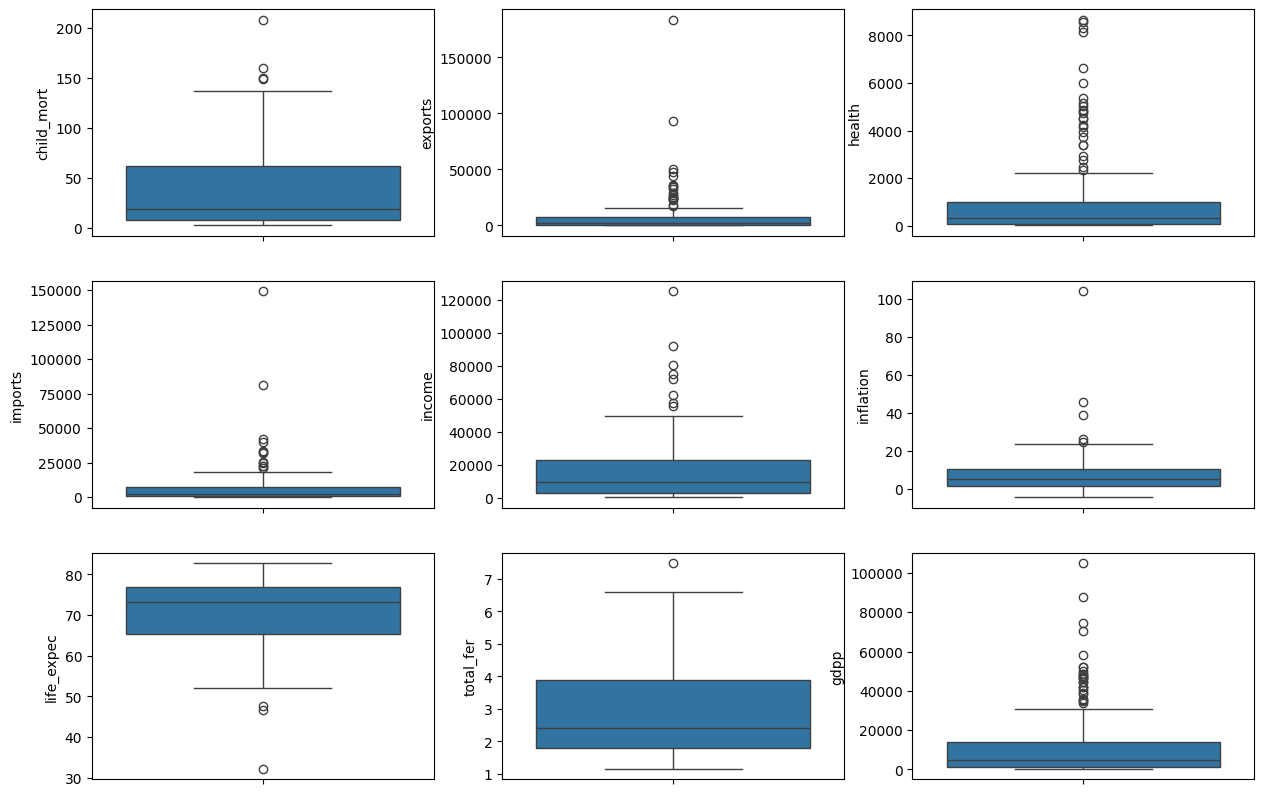

In [ ]:

plt.figure(figsize=(15, 10))
plt.subplot(3, 3, 1)
sns.boxplot(df.child_mort)
plt.subplot(3, 3, 2)
sns.boxplot(df.exports)
plt.subplot(3, 3, 3)
sns.boxplot(df.health)
plt.subplot(3, 3, 4)
sns.boxplot(df.imports)
plt.subplot(3, 3, 5)
sns.boxplot(df.income)
plt.subplot(3, 3, 6)
sns.boxplot(df.inflation)
plt.subplot(3, 3, 7)
sns.boxplot(df.life_expec)
plt.subplot(3, 3, 8)
sns.boxplot(df.total_fer)
plt.subplot(3, 3, 9)
sns.boxplot(df.gdpp)
plt.show()


- Qua biểu đồ box-plot ta có thể thấy có xuất hiện outlier trong bộ dữ liệu

### 2.5 Kiểm tra tính tương quan

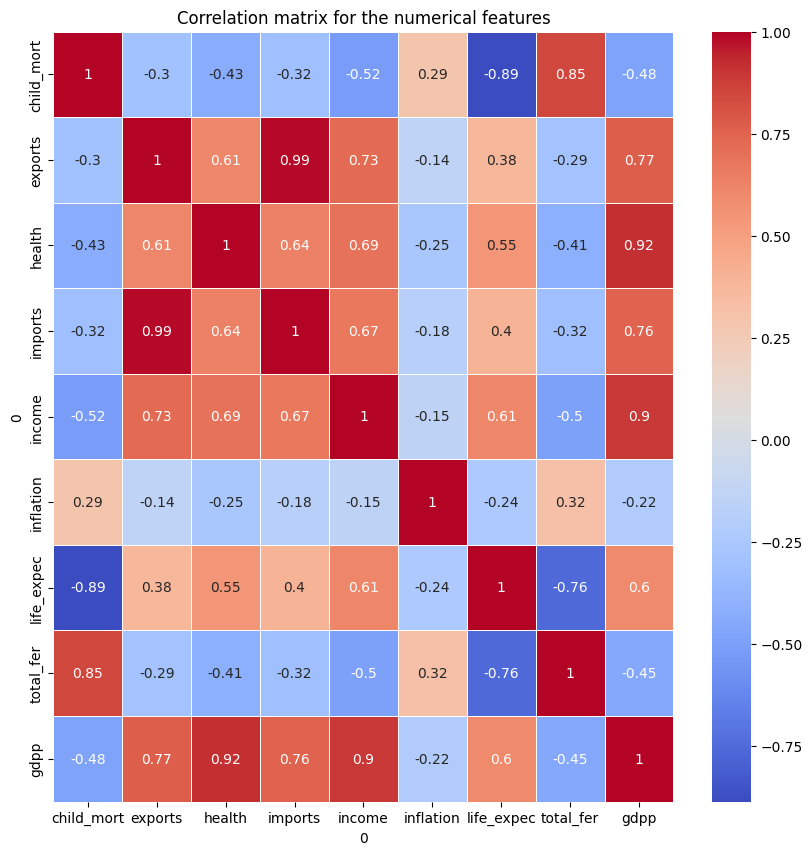

In [ ]:
numerical_attributes = column_names [1:]
numerical_attributes = df.select_dtypes(include=[np.number]).columns.tolist()

# Tính toán ma trận tương quan
corr = df[numerical_attributes].corr()

# Vẽ heatmap
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, linewidth=0.5, xticklabels=numerical_attributes, yticklabels=numerical_attributes, cmap='coolwarm')
ax.set_title("Correlation matrix for the numerical features")
plt.show()

Bản đồ nhiệt là một ma trận tương quan cho thấy mối quan hệ giữa các đặc điểm số khác nhau. Dưới đây là đánh giá các điểm chính từ bản đồ nhiệt:

Giá trị tương quan:

Ma trận hiển thị giá trị tương quan trong khoảng từ -1 đến 1, trong đó:
1 chỉ ra tương quan dương hoàn hảo.
-1 chỉ ra tương quan âm hoàn hảo.
0 chỉ ra không có tương quan.

Tương quan đáng kể:

- Xuất khẩu và Nhập khẩu: Tương quan dương gần như hoàn hảo (0.99). Điều này cho thấy các quốc gia có xuất khẩu cao cũng có xu hướng nhập khẩu cao.
Y tế và GDP: Tương quan dương mạnh (0.92). Chi tiêu y tế tốt hơn có liên quan đến GDP cao hơn.
- Thu nhập và GDP: Tương quan dương mạnh (0.9). Thu nhập cao hơn liên quan đến GDP cao hơn.
- Tỷ lệ tử vong trẻ em và Tuổi thọ: Tương quan âm mạnh (-0.89). Tỷ lệ tử vong trẻ em cao hơn liên quan đến tuổi thọ thấp hơn.
- Tỷ lệ tử vong trẻ em và Tổng tỷ suất sinh: Tương quan dương mạnh (0.85). Tỷ lệ tử vong trẻ em cao hơn liên quan đến tỷ suất sinh cao hơn.

Tương quan vừa phải:

- Thu nhập và Y tế: Tương quan dương vừa phải (0.69). Thu nhập cao hơn liên quan đến kết quả y tế tốt hơn.
- Tuổi thọ và Y tế: Tương quan dương vừa phải (0.61). Chi tiêu y tế tốt hơn liên quan đến tuổi thọ cao hơn.
- Thu nhập và Tuổi thọ: Tương quan dương vừa phải (0.61). Thu nhập cao hơn liên quan đến tuổi thọ cao hơn.

Tương quan thấp hoặc không có:

- Lạm phát với hầu hết các đặc điểm: Nói chung là các tương quan thấp, chỉ ra rằng lạm phát không có mối quan hệ tuyến tính mạnh với hầu hết các đặc điểm khác.

Tương quan âm:

- Tỷ lệ tử vong trẻ em và Thu nhập: Tương quan âm vừa phải (-0.52). Mức thu nhập cao hơn liên quan đến tỷ lệ tử vong trẻ em thấp hơn.
- Tổng tỷ suất sinh và Tuổi thọ: Tương quan âm mạnh (-0.76). Tỷ suất sinh cao hơn liên quan đến tuổi thọ thấp hơn..

### 2.6 Distribution of Features ( Sự phân bố )

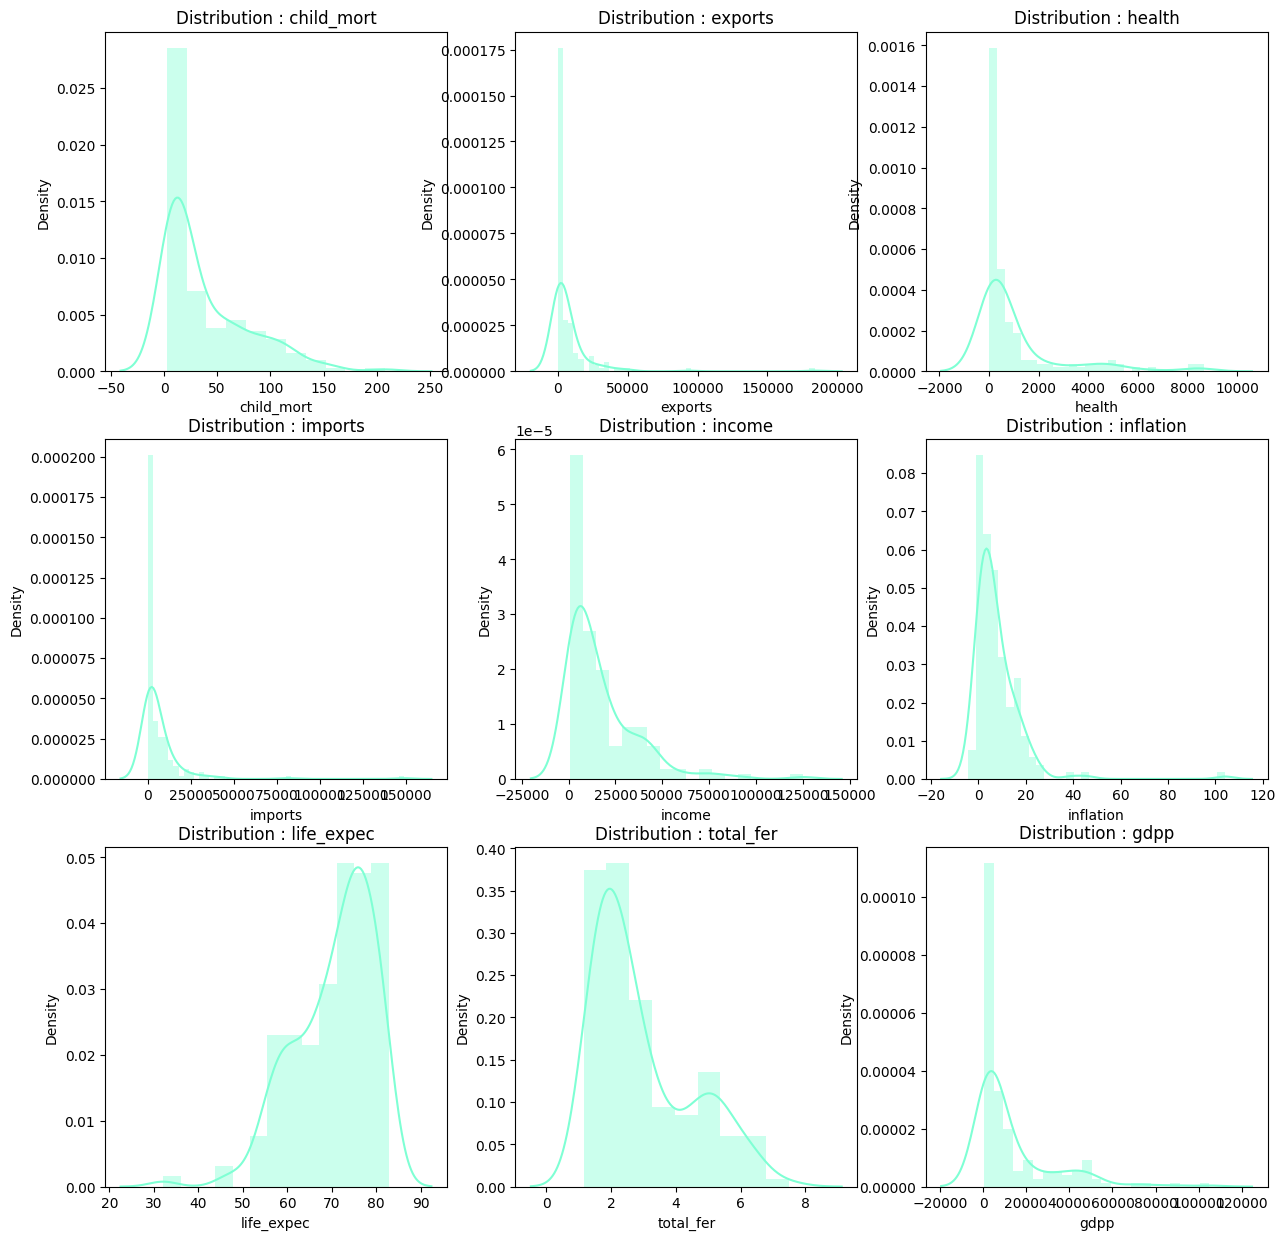

In [ ]:
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_attributes)):
    plt.subplot(3,3,i+1)
    sns.distplot(df[numerical_attributes[i]],color = "#7fffd4")
    title = 'Distribution : ' + numerical_attributes[i]
    plt.title(title)
plt.show()

Các đồ thị được cung cấp cho thấy phân bố của một số đặc điểm số. Dưới đây là đánh giá về từng phân bố:

**Tỷ lệ tử vong trẻ em (child_mort):**
Phân bố lệch trái nặng, cho thấy hầu hết các quốc gia có tỷ lệ tử vong trẻ em thấp, nhưng một số quốc gia có tỷ lệ rất cao.

**Xuất khẩu:**
Phân bố cũng lệch trái. Hầu hết các quốc gia có giá trị xuất khẩu tương đối thấp, trong khi một số ít có giá trị xuất khẩu cực kỳ cao.

**Y tế:**
Phân bố lệch trái, cho thấy hầu hết các quốc gia chi tiêu tương đối thấp cho y tế, với một số quốc gia chi tiêu nhiều hơn đáng kể.

**Nhập khẩu:**
Tương tự như xuất khẩu, phân bố nhập khẩu lệch trái. Điều này chỉ ra rằng hầu hết các quốc gia nhập khẩu tương đối ít, nhưng một số nhập khẩu số lượng đáng kể.

**Thu nhập:**
Phân bố thu nhập lệch trái, cho thấy hầu hết các quốc gia có mức thu nhập từ thấp đến trung bình, với một số quốc gia có thu nhập rất cao.

**Lạm phát:**
Phân bố lạm phát có vẻ lệch trái, với hầu hết các quốc gia trải qua tỷ lệ lạm phát từ thấp đến trung bình, và một số ít trải qua tỷ lệ lạm phát cao.

**Tuổi thọ (life_expec):**
Phân bố tuổi thọ lệch phải, nghĩa là hầu hết các quốc gia có tuổi thọ cao, với một số quốc gia có tuổi thọ thấp đáng kể.

**Tổng tỷ suất sinh (total_fer):**
Phân bố hơi có hai đỉnh với lệch trái, chỉ ra rằng mặc dù nhiều quốc gia có tỷ suất sinh thấp, vẫn còn một số lượng đáng kể các quốc gia có tỷ suất sinh cao hơn.

**GDP (gdpp):**
Phân bố GDP lệch trái, cho thấy hầu hết các quốc gia có GDP thấp, trong khi một số có giá trị GDP rất cao.

**Quan sát chung:**
- Hầu hết các đặc điểm đều lệch trái, điều này là điển hình cho dữ liệu kinh tế và y tế, nơi một số ít quốc gia hoặc thực thể có giá trị cao đáng kể so với phần còn lại.
- Sự hiện diện của các giá trị ngoại lai trong nhiều phân bố này cho thấy cần cân nhắc kỹ lưỡng tác động của chúng đến bất kỳ mô hình thống kê hoặc học máy nào được xây dựng với dữ liệu này.
- Sự lệch phải cho thấy có thể cần chuẩn hóa dữ liệu trước khi xây dựng mô hình Vì chúng ta cần tính khoảng cách Euclide giữa các điểm dữ liệu, điều quan trọng là phải đảm bảo rằng các thuộc tính có phạm vi giá trị lớn hơn không vượt trội hơn các thuộc tính có phạm vi giá trị nhỏ hơn.

### 2.7 Dispersion of Features ( Sự phân tán )

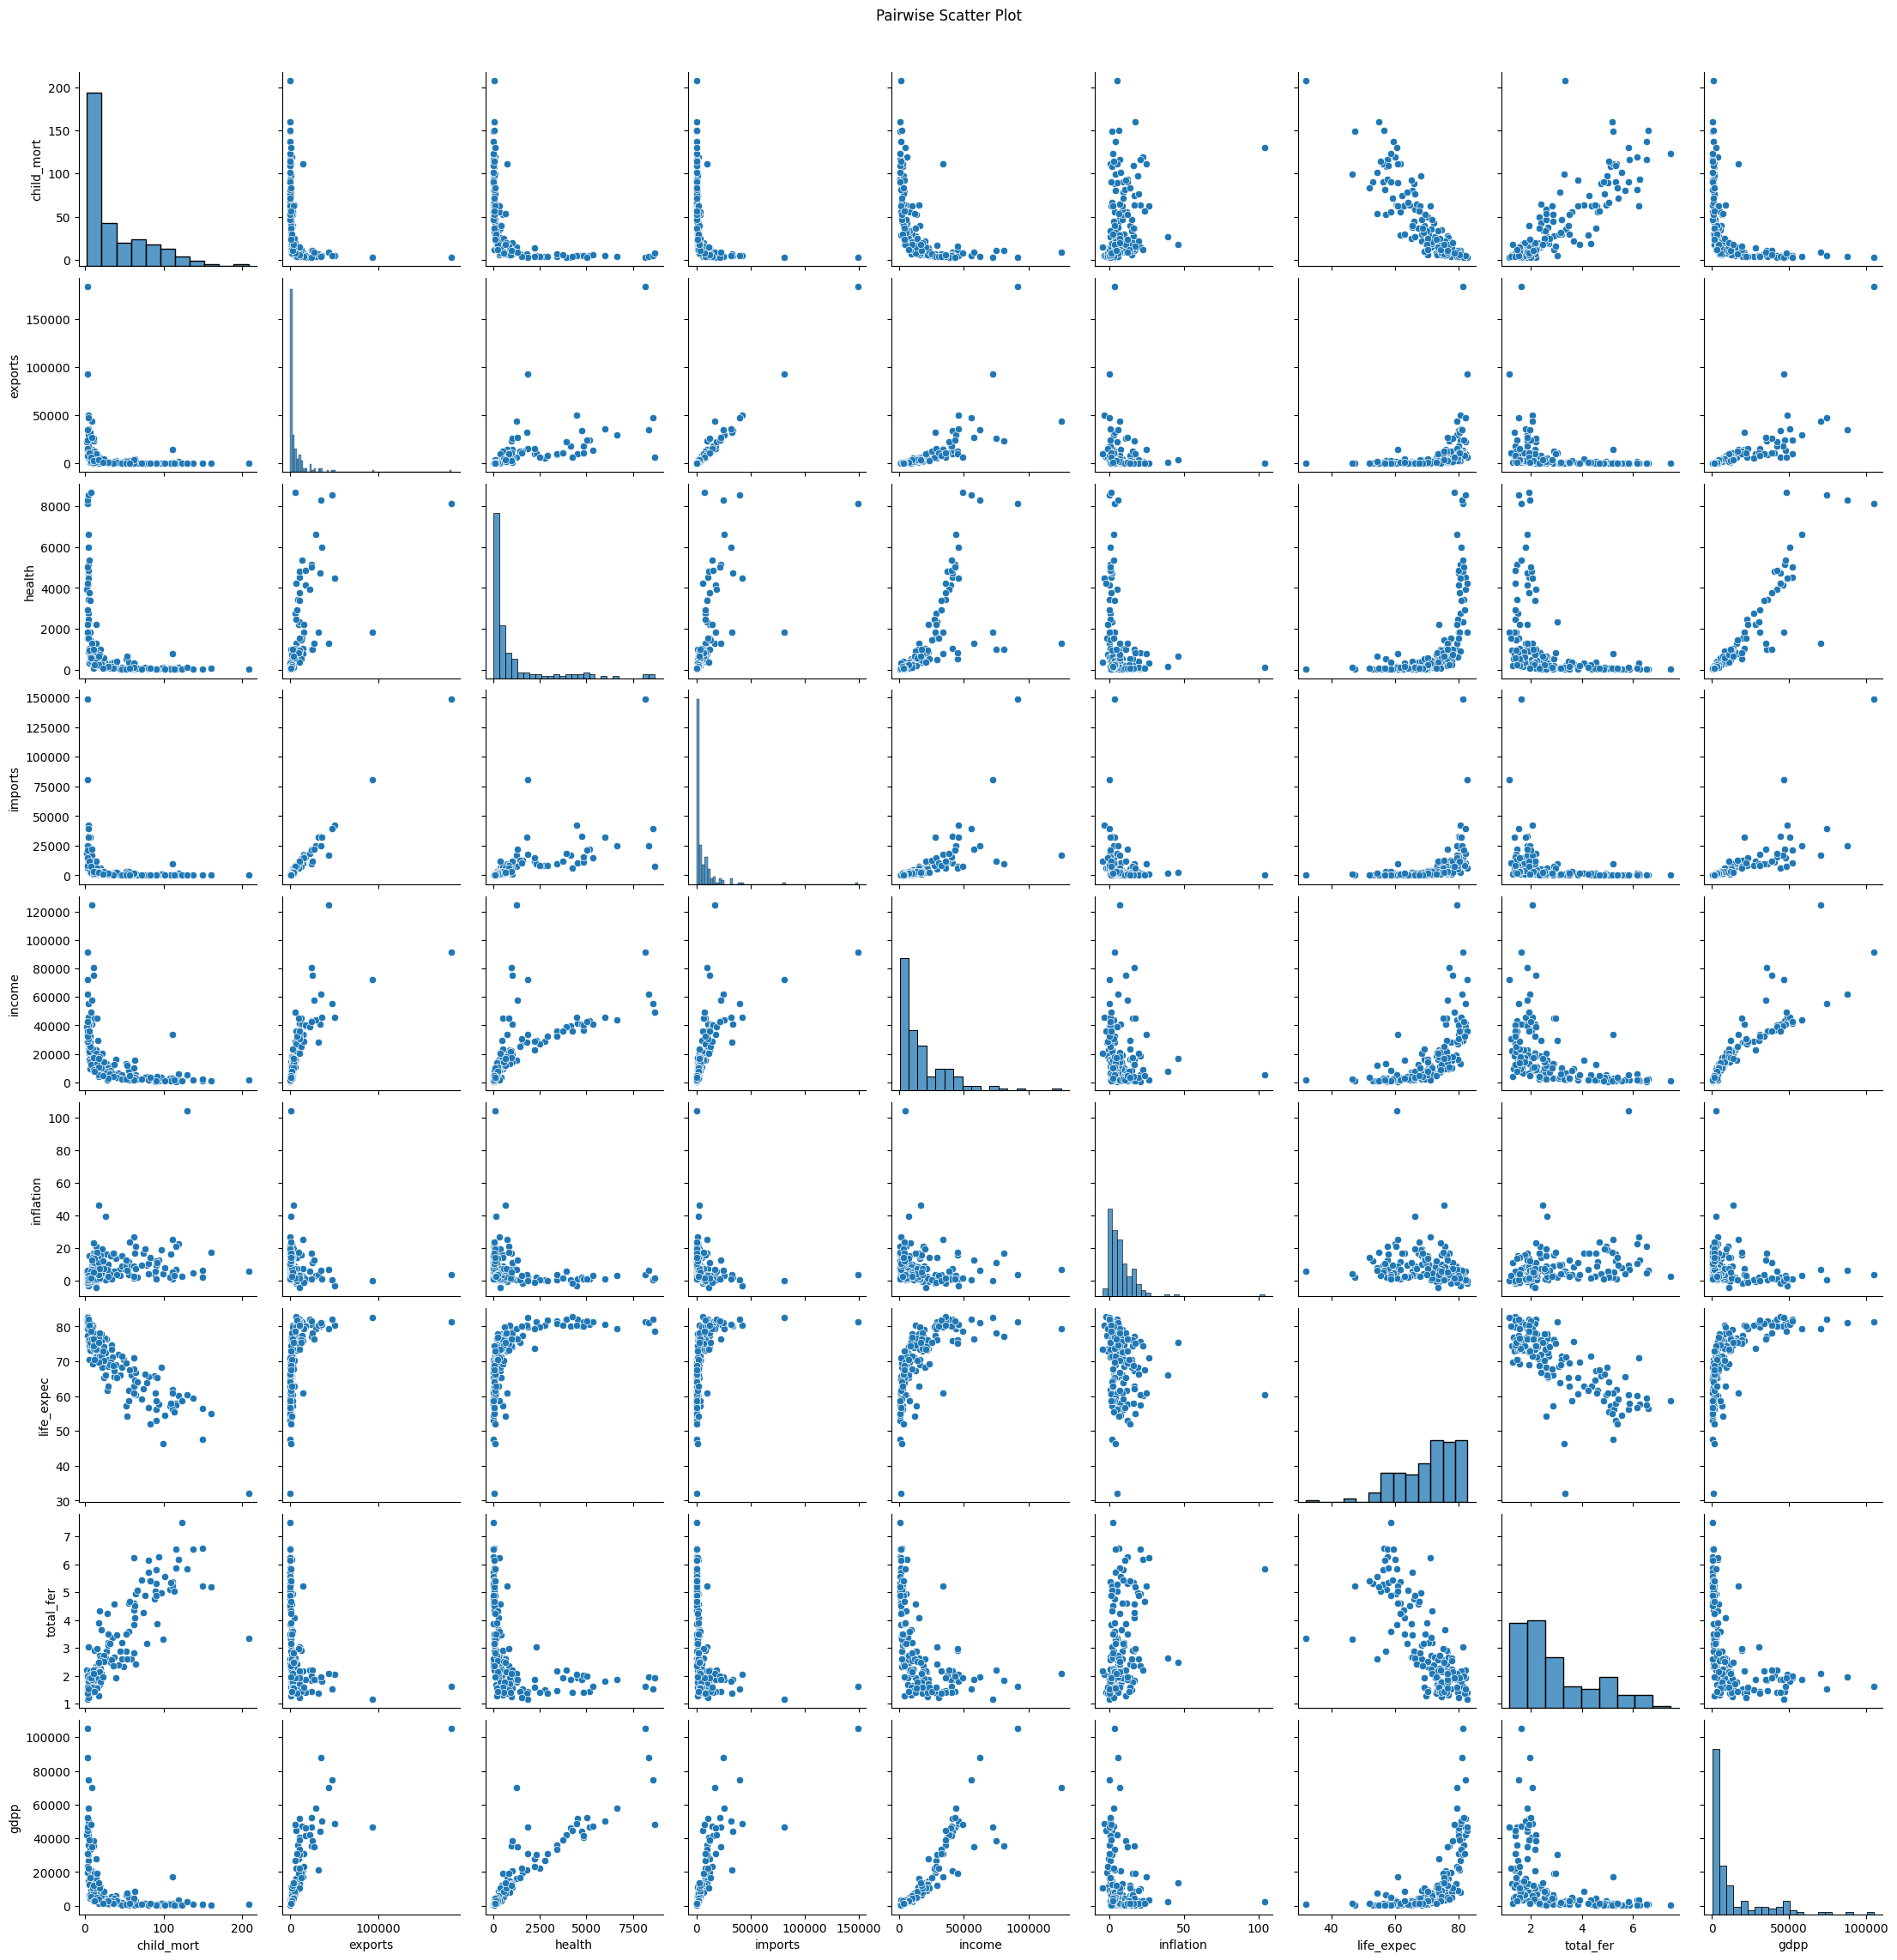

In [ ]:
# Lấy danh sách các biến từ DataFrame
variables = numerical_attributes

# Vẽ ma trận scatter plot cho tất cả các cặp biến
sns.pairplot(df)
plt.suptitle('Pairwise Scatter Plot', y=1.02)
plt.show()

Quan sát quan trọng:

**Tỷ lệ tử vong trẻ em (Child Mortality Rate):**

Tương quan âm với thu nhập, tuổi thọ và GDP bình quân đầu người.
Các quốc gia có tỷ lệ tử vong trẻ em cao thường có thu nhập thấp, tuổi thọ thấp và GDP bình quân đầu người thấp.

**Xuất khẩu và Nhập khẩu:**

Hiển thị một mối quan hệ dương với nhau. Điều này cho thấy các quốc gia có tỷ lệ xuất khẩu cao cũng có xu hướng có tỷ lệ nhập khẩu cao.

Chi tiêu y tế (Health Expenditure):
**bold text**
Tương quan dương với tuổi thọ, cho thấy việc chi tiêu y tế cao hơn liên quan đến tuổi thọ dài hơn.
Mối quan hệ tích cực hơn với thu nhập và GDP bình quân đầu người.

**Thu nhập:**

Tương quan tích cực mạnh với tuổi thọ và GDP bình quân đầu người.
Tương quan tiêu cực với tỷ lệ tử vong trẻ em và tỷ suất sinh.
Khi thu nhập tăng, tỷ lệ tử vong trẻ em và tỷ suất sinh có xu hướng giảm.

**Lạm phát (Inflation):**

Không có tương quan mạnh với các biến số khác, cho thấy hành vi của nó có thể phụ thuộc vào các yếu tố phức tạp hoặc độc lập.

**Tuổi thọ (Life Expectancy):**

Tương quan tiêu cực mạnh với tỷ lệ tử vong trẻ em và tỷ suất sinh.
Tương quan tích cực với thu nhập, chi tiêu y tế và GDP bình quân đầu người.
Các quốc gia có tuổi thọ cao thường có tỷ lệ tử vong trẻ em và tỷ suất sinh thấp, và thu nhập, chi tiêu y tế và GDP bình quân đầu người cao hơn.

**Tổng tỷ suất sinh (Total Fertility Rate):**

Tương quan tiêu cực với thu nhập, tuổi thọ và GDP bình quân đầu người.
Tỷ suất sinh cao hơn thường liên quan đến thu nhập thấp, tuổi thọ thấp và GDP bình quân đầu người thấp.

**GDP bình quân đầu người (GDP per Capita):**

Tương quan tiêu cực mạnh với tỷ lệ tử vong trẻ em và tỷ suất sinh.
Tương quan tích cực mạnh với thu nhập và tuổi thọ.
GDP bình quân đầu người cao hơn thường liên quan đến tỷ lệ tử vong trẻ em và tỷ suất sinh thấp, và thu nhập và tuổi thọ cao hơn.

**Tóm tắt:**
Bộ biểu đồ cặp nhấn mạnh một số mối quan hệ quan trọng giữa các chỉ số kinh tế - xã hội. Nói chung, thu nhập cao, tuổi thọ và GDP bình quân đầu người liên quan đến tỷ lệ tử vong trẻ em và tỷ suất sinh thấp hơn. Ngoài ra, có một mối quan hệ tích cực giữa xuất khẩu và nhập khẩu, cho thấy các quốc gia có hoạt động thương mại cao có xu hướng nhập khẩu và xuất khẩu nhiều hơn. Chi tiêu y tế liên quan tích cực với tuổi thọ, thể hiện tầm quan trọng của việc đầu tư vào sức khỏe. Lạm phát có vẻ có mối quan hệ phức tạp hơn với các biến số này, với không có tương quan rõ ràng mạnh mẽ. Những quan sát này có thể hữu ích cho các nhà hoạch định chính sách và nghiên cứu để hiểu về sự tương tác giữa sự phát triển kinh tế, kết quả sức khỏe và các yếu tố dân số học.

## 3. Tiền xử lý

##3.1 Loại bỏ cột không cần thiết trước khi phân cụm



In [ ]:
# Chọn các cột có kiểu dữ liệu số học
numeric_cols = df.select_dtypes(include=['number'])
data = numeric_cols.copy()

Loại bỏ cột country trước khi phân cụm vì nó không gây ảnh hưởng đến việc phân cụm

##3.2 Xử lý outlier
Với đề tài phân loại quốc gia cần cứu trợ bằng phương pháp clustering thì:
- Nếu áp dụng xử lý ngoại lai bằng capping/floring, điều này sẽ thay đổi thứ hạng của một số quốc gia đối với yêu cầu Vấn đề Tài chính.
- Nếu  áp dụng xử lý ngoại lai bằng cách Loại bỏ dựa trên các giá trị IQR, điều này sẽ loại bỏ một số quốc gia khỏi danh sách mà thực sự xứng đáng với viện trợ Tài chính.

--> Nhóm em chọn biện pháp là không xử lý outlier để có thể có dữ liệu phong phú hơn về các quốc gia cần cứu trợ


##3.3 Feature Scaling
Phạm vi của tất cả các đặc điểm đều khác nhau, điều này cho thấy cần phải chuẩn hóa dữ liệu trước khi chúng ta xây dựng mô hình. Vì chúng ta cần tính khoảng cách Euclidean giữa các điểm dữ liệu, việc đảm bảo rằng các thuộc tính có phạm vi giá trị lớn không nên áp đảo các thuộc tính có phạm vi nhỏ là rất quan trọng. Ở đây nhóm em dùng Standardization một phương pháp thường được ưa chuộng trong K-Means, vì nó giúp đồng nhất phương sai của các đặc trưng và tránh sự ảnh hưởng của đơn vị đo lường khác nhau. Scaling cũng có thể giúp giảm sự ảnh hưởng của outlier trong dữ liệu bằng cách đưa các giá trị về cùng một phạm vi.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Tạo đối tượng scaler
scaler = StandardScaler()


# Fit và transform dữ liệu
df_scaled = scaler.fit_transform(data)

# Chuyển đổi lại thành DataFrame với các cột đã scale
df_scaled = pd.DataFrame(df_scaled, columns=data.columns)

# Hiển thị dữ liệu đã scale
print(df_scaled.head())




0  child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -0.411011 -0.565040 -0.432276 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.350191 -0.439218 -0.313677 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.318526 -0.484826 -0.353720 -0.220844   0.789274    0.670423   
3    2.007808 -0.291375 -0.532363 -0.345953 -0.585043   1.387054   -1.179234   
4   -0.695634 -0.104331 -0.178771  0.040735  0.101732  -0.601749    0.704258   

0  total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817  


##3.4. Hopkins Statistics
Trước khi áp dụng bất kỳ thuật phân cụm nào vào dữ liệu đã cho, việc kiểm tra liệu dữ liệu đã cho có các cụm ý nghĩa không là rất quan trọng? Điều này nói chung có nghĩa là dữ liệu đã cho không phải là ngẫu nhiên. Quá trình đánh giá dữ liệu để kiểm tra xem liệu dữ liệu có thích hợp cho việc phân cụm không được gọi là tính chất phân cụm. Để kiểm tra tính chất phân cụm, chúng ta sử dụng thử nghiệm Hopkins. Thử nghiệm Hopkins kiểm tra xem các điểm dữ liệu có khác biệt đáng kể so với dữ liệu phân phối đồng đều trong không gian đa chiều không.




In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    """
    Tính chỉ số Hopkins của một tập dữ liệu.

    Parameters:
        X (DataFrame or array-like): Tập dữ liệu cần tính chỉ số Hopkins.

    Returns:
        float: Chỉ số Hopkins của tập dữ liệu.
    """
    d = X.shape[1]  # số cột
    n = len(X)      # số hàng
    m = int(0.1 * n)  # số lượng mẫu được lấy

    # Khởi tạo model knn để tính khoảng cách
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    # Lấy ngẫu nhiên m mẫu từ tập dữ liệu
    rand_X = sample(range(0, n, 1), m)

    ujd = []  # danh sách để lưu khoảng cách từ mẫu ngẫu nhiên đến điểm dữ liệu gần nhất
    wjd = []  # danh sách để lưu khoảng cách từ mẫu ngẫu nhiên đến điểm dữ liệu gần nhất

    # Tính toán khoảng cách
    for j in range(0, m):
        # Khoảng cách từ mẫu ngẫu nhiên đến điểm dữ liệu gần nhất
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1),
                                    2, return_distance=True)
        ujd.append(u_dist[0][1])

        # Khoảng cách từ điểm dữ liệu ngẫu nhiên đến điểm dữ liệu gần nhất
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    # Tính chỉ số Hopkins
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        H = 0

    return H

hopkins(df_scaled)

0.9074343982158178


Thống kê Hopkins trên 0.70 là một điểm số tốt, cho thấy rằng dữ liệu thích hợp cho phân tích cụm. Một giá trị 'Thống kê Hopkins' gần 1 thường cho thấy dữ liệu có sự phân cụm cao, dữ liệu ngẫu nhiên thường dẫn đến các giá trị xung quanh 0.5, và dữ liệu được phân phối đồng đều thường dẫn đến các giá trị gần với 0.

##4. Modeling





Phân cụm dữ liệu:
+ Sử dụng K-Means
+ Sử dụng Hierarchical Clustering
+ Sử dụng Gaussian Mixture Model

Xác định số lượng cụm tối ưu cho K-means bằng phương pháp Elbow. Kết quả cho thấy số lượng cụm phù hợp là 3 (dựa vào điểm khủy tay)



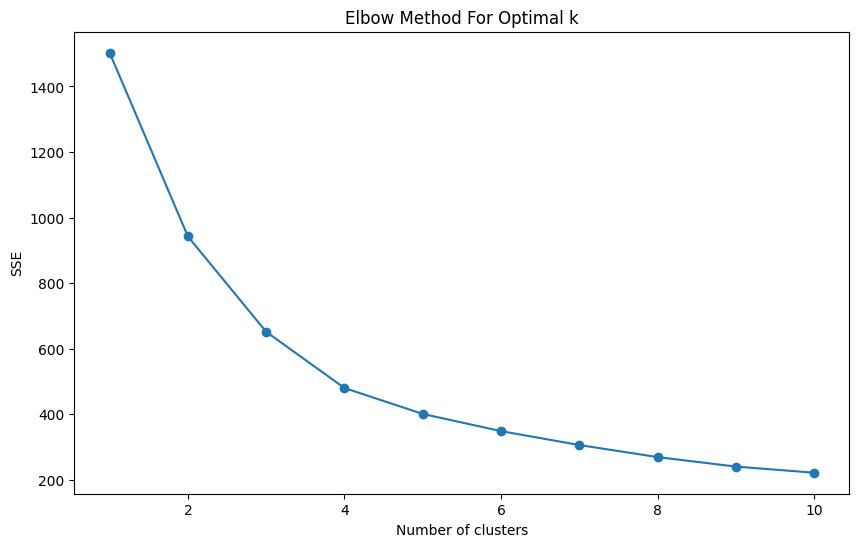

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd


sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()


Xác định số lượng cụm tối ưu cho Hierachical clustering bằng Dendrogram. Kết quả cho thấy số lượng cụm phù hợp là 3




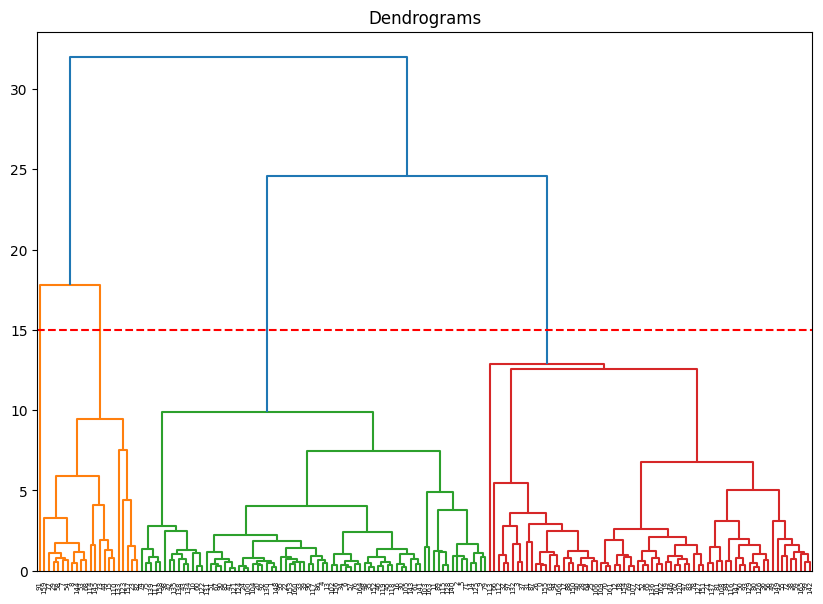

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))
plt.axhline(y=15, color='r', linestyle='--')  # Adjust the y value as needed
plt.show()


Xác định số lượng cụm tối ưu cho Gaussian Mixture bằng BIC. Kết quả cho thấy số lượng cụm phù hợp là 3 (do BIC thấp nhất khi số lượng cụm bằng 3)

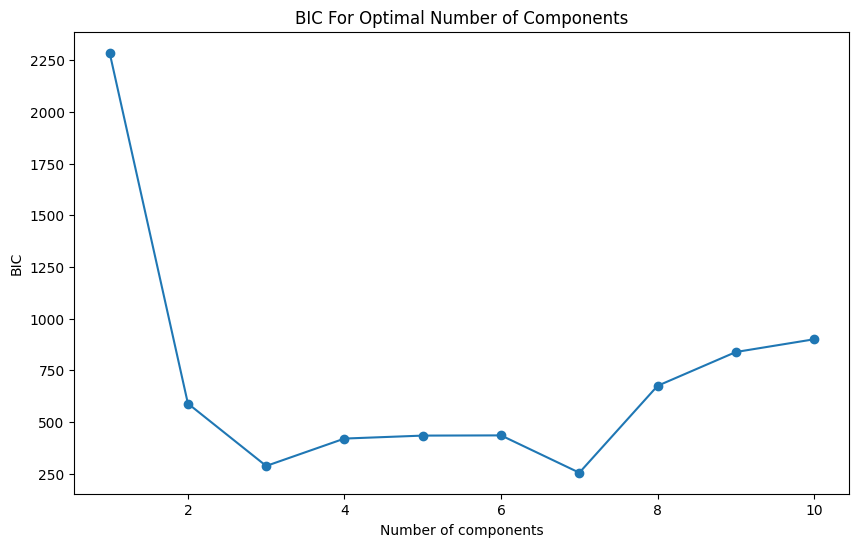

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

bic = []
n_components_range = range(1, 11)
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(df_scaled)
    bic.append(gmm.bic(df_scaled))

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic, marker='o')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('BIC For Optimal Number of Components')
plt.show()


+ Tiến hành phân cụm bằng ba mô hình trên với số lượng cụm là 3.
+ Tính toán Silhouette score, Calinski-Harabasz score và Davies-Bouldin score cho mỗi mô hình.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Giả sử 'df_scaled' đã được chuẩn hóa và là một DataFrame
# df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols.columns) # Cần thêm dòng này nếu df_scaled chưa được định nghĩa

# Số lượng cụm
n_clusters = 3

# KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical_labels = hierarchical.fit_predict(df_scaled)

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(df_scaled)

# Đánh giá các mô hình phân cụm
models = {
    'KMeans': kmeans_labels,
    'Hierarchical': hierarchical_labels,
    'Gaussian Mixture': gmm_labels
}

# Tạo một DataFrame để lưu trữ các scores
scores_list = []

for model_name, labels in models.items():
    silhouette_avg = silhouette_score(df_scaled, labels)
    calinski_harabasz_avg = calinski_harabasz_score(df_scaled, labels)
    davies_bouldin_avg = davies_bouldin_score(df_scaled, labels)

    scores_list.append({
        'Model': model_name,
        'Silhouette Score': silhouette_avg,
        'Calinski-Harabasz Score': calinski_harabasz_avg,
        'Davies-Bouldin Score': davies_bouldin_avg
    })

scores_df = pd.DataFrame(scores_list)
print(scores_df)


              Model  Silhouette Score  Calinski-Harabasz Score  \
0            KMeans          0.421862               107.206933   
1      Hierarchical          0.349364                96.554685   
2  Gaussian Mixture          0.296338                89.393361   

   Davies-Bouldin Score  
0              0.856631  
1              0.947020  
2              1.004828  


Lưu mô hình phân cụm cho kết quả tốt nhất dựa trên Silhouette Score

In [ ]:
import joblib

# Find the model with the highest Silhouette Score
best_model_name = scores_df.loc[scores_df['Silhouette Score'].idxmax(), 'Model']

# Save the corresponding model
if best_model_name == 'KMeans':
    best_model = kmeans
elif best_model_name == 'Hierarchical':
    best_model = hierarchical
elif best_model_name == 'Gaussian Mixture':
    best_model = gmm

# Save the model using joblib
joblib.dump(best_model, f'best_model_{best_model_name}.pkl')

print(f"Best model '{best_model_name}' saved as 'best_model_{best_model_name}.pkl'")


Best model 'KMeans' saved as 'best_model_KMeans.pkl'


In [ ]:
# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans_labels

# Print the data for each cluster
for cluster in range(n_clusters):
    print(f"\nData for Cluster {cluster}:")
    print(df[df['Cluster'] == cluster])


Data for Cluster 0:
0                country  child_mort  exports   health  imports  income  \
1                Albania        16.6  1145.20  267.895  1987.74    9930   
2                Algeria        27.3  1712.64  185.982  1400.44   12900   
4    Antigua and Barbuda        10.3  5551.00  735.660  7185.80   19100   
5              Argentina        14.5  1946.70  834.300  1648.00   18700   
6                Armenia        18.1   669.76  141.680  1458.66    6700   
..                   ...         ...      ...      ...      ...     ...   
160              Uruguay        10.6  3129.70  993.650  3022.60   17100   
161           Uzbekistan        36.3   437.46   80.178   393.30    4240   
162              Vanuatu        29.2  1384.02  155.925  1565.19    2950   
163            Venezuela        17.1  3847.50  662.850  2376.00   16500   
164              Vietnam        23.3   943.20   89.604  1050.62    4490   

0    inflation  life_expec  total_fer   gdpp  Cluster  
1         4.49        

In [ ]:
# Add the cluster labels to the original DataFrame
df['Cluster'] = kmeans_labels

# Print the data for Cluster 0
print("\nData for Cluster 0:")
print(df[df['Cluster'] == 0].to_string(index=False))



Data for Cluster 0:
                       country  child_mort     exports    health      imports  income  inflation  life_expec  total_fer  gdpp  Cluster
                       Albania        16.6  1145.20000  267.8950  1987.740000    9930      4.490        76.3       1.65  4090        0
                       Algeria        27.3  1712.64000  185.9820  1400.440000   12900     16.100        76.5       2.89  4460        0
           Antigua and Barbuda        10.3  5551.00000  735.6600  7185.800000   19100      1.440        76.8       2.13 12200        0
                     Argentina        14.5  1946.70000  834.3000  1648.000000   18700     20.900        75.8       2.37 10300        0
                       Armenia        18.1   669.76000  141.6800  1458.660000    6700      7.770        73.3       1.69  3220        0
                    Azerbaijan        39.2  3171.12000  343.3920  1208.880000   16000     13.800        69.1       1.92  5840        0
                       Bahamas    

Trực quan hóa kết quả phân cụm: Plot kết quả phân cụm của từng mô hình.

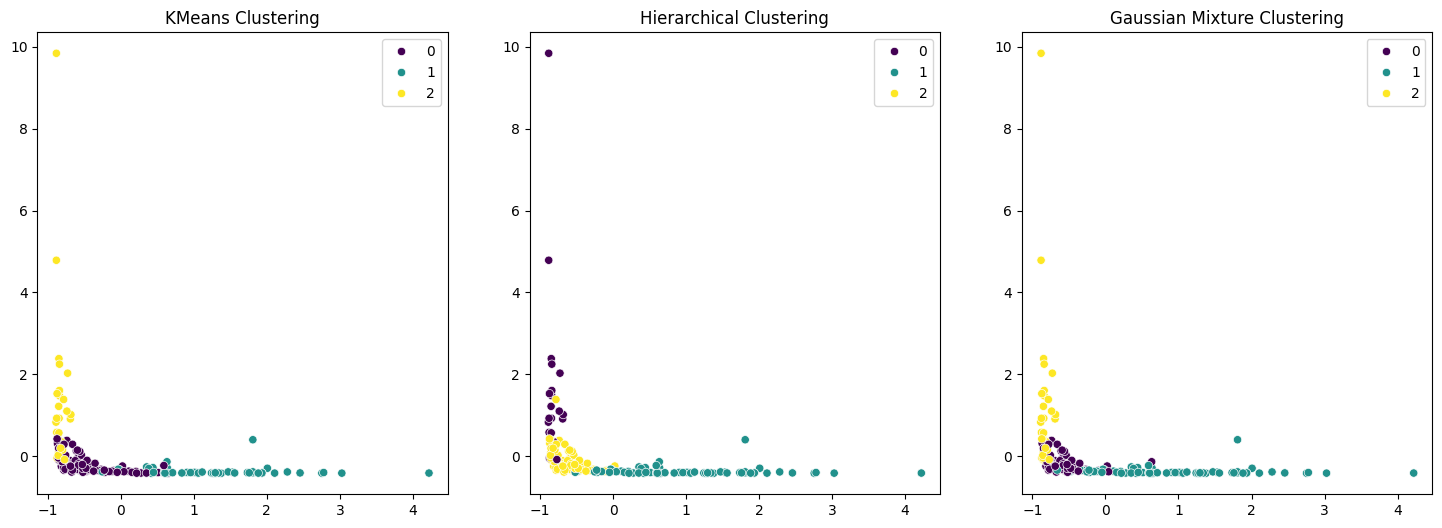

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# KMeans Clustering
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=kmeans_labels, palette='viridis', ax=axs[0])
axs[0].set_title('KMeans Clustering')
axs[0].set_xlabel('')
axs[0].set_ylabel('')

# Hierarchical Clustering
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=hierarchical_labels, palette='viridis', ax=axs[1])
axs[1].set_title('Hierarchical Clustering')
axs[1].set_xlabel('')
axs[1].set_ylabel('')

# Gaussian Mixture
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=gmm_labels, palette='viridis', ax=axs[2])
axs[2].set_title('Gaussian Mixture Clustering')
axs[2].set_xlabel('')
axs[2].set_ylabel('')

plt.show()


##5. Cluster analyst





Phân tích đặc trưng của tựng cụm sau khi chọn được model tốt nhất

In [ ]:
# Xác định đặc trưng chung của từng cụm
cluster_characteristics_list = []

for model_name, labels in models.items():
    df_clustered = df_scaled.copy()
    df_clustered['Cluster'] = labels

    cluster_summary = df_clustered.groupby('Cluster').mean()
    cluster_summary['Model'] = model_name
    cluster_characteristics_list.append(cluster_summary)

cluster_characteristics = pd.concat(cluster_characteristics_list)
print(cluster_characteristics)



0        child_mort   exports    health   imports    income  inflation  \
Cluster                                                                  
0         -0.445506 -0.212973 -0.283659 -0.196220 -0.165277  -0.067490   
1          1.326610 -0.365042 -0.524447 -0.392817 -0.689238   0.391812   
2         -0.826294  1.317948  1.820945  1.311116  1.718701  -0.452334   
0         -0.825527  1.572752  2.043785  1.513561  1.959147  -0.424433   
1          0.913107 -0.365492 -0.522662 -0.385914 -0.666808   0.256783   
2         -0.610079 -0.120215 -0.111692 -0.083792  0.047671  -0.115164   
0         -0.543960 -0.177859 -0.255835 -0.160572 -0.050665  -0.057424   
1          0.900919 -0.366529 -0.525031 -0.387619 -0.673256   0.270967   
2         -0.829615  1.200228  1.721551  1.209806  1.608039  -0.479009   

0        life_expec  total_fer      gdpp             Model  
Cluster                                                     
0          0.327609  -0.472342 -0.272754            KMeans  
1 

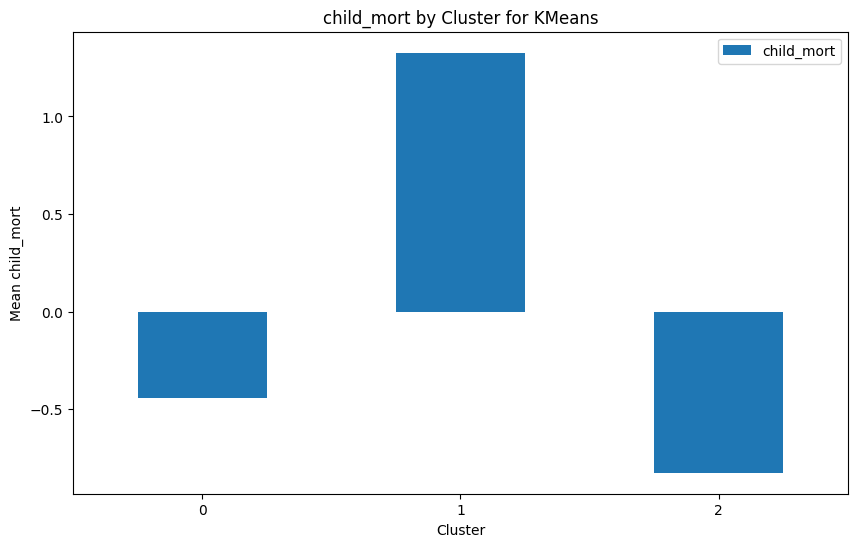

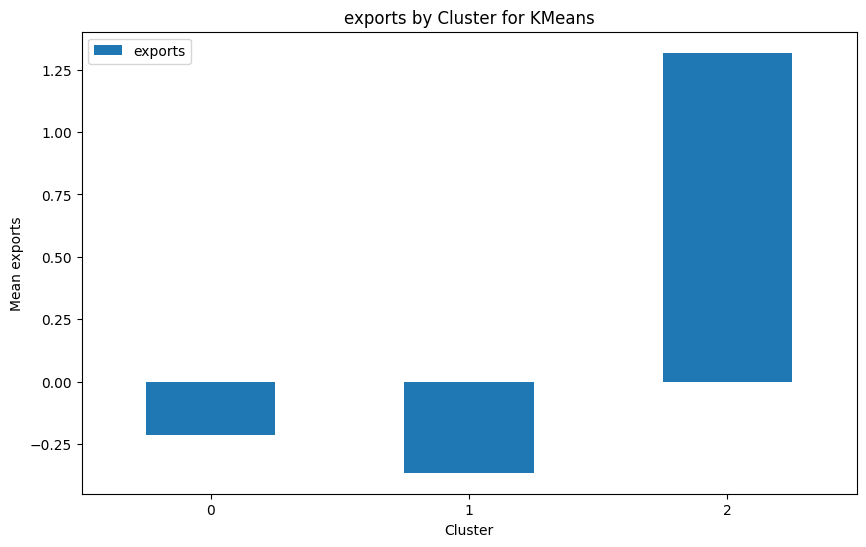

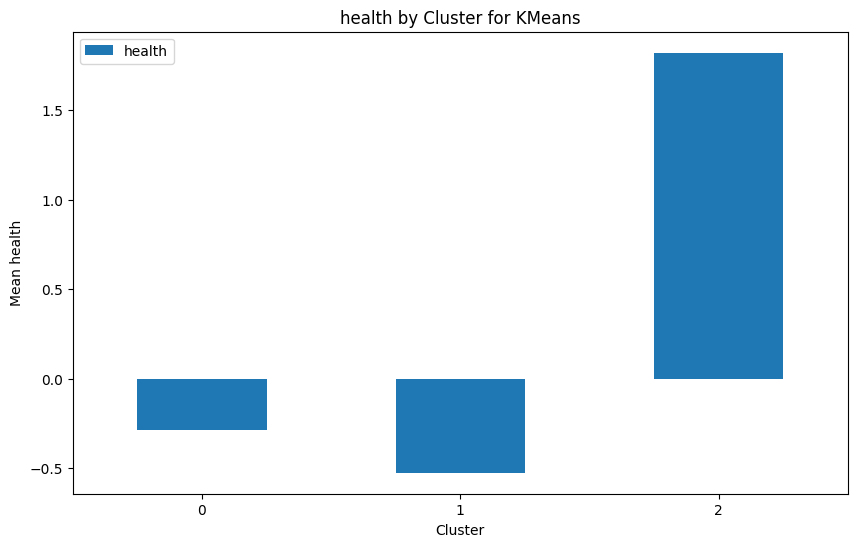

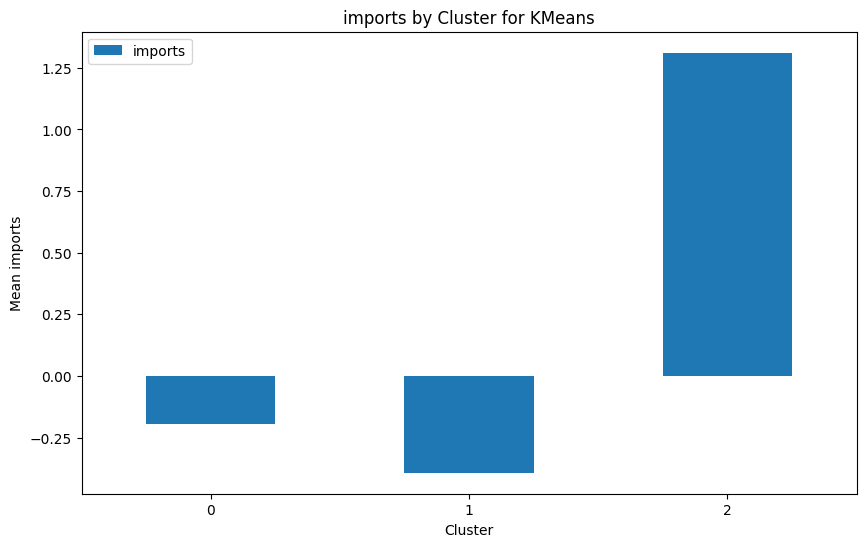

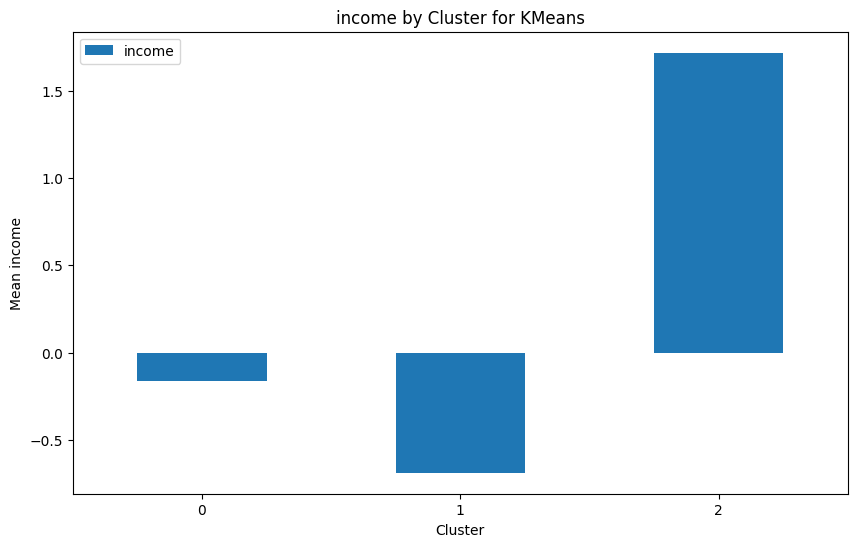

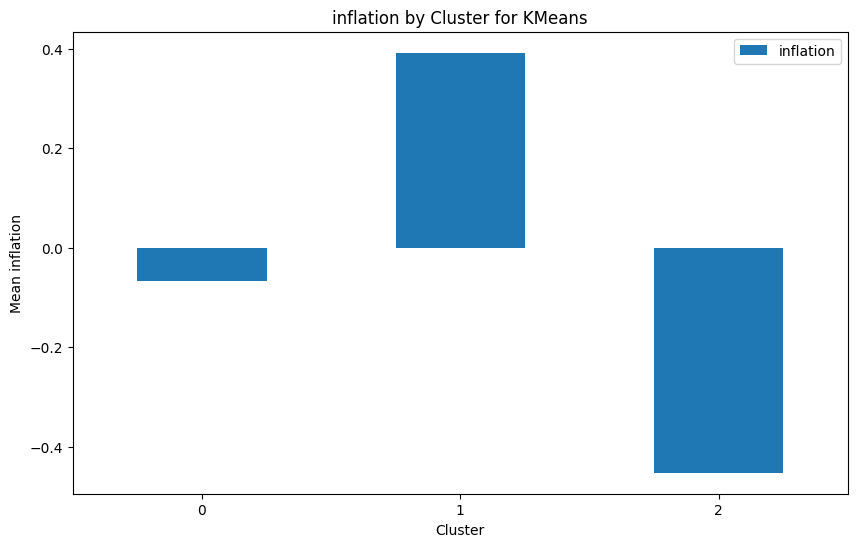

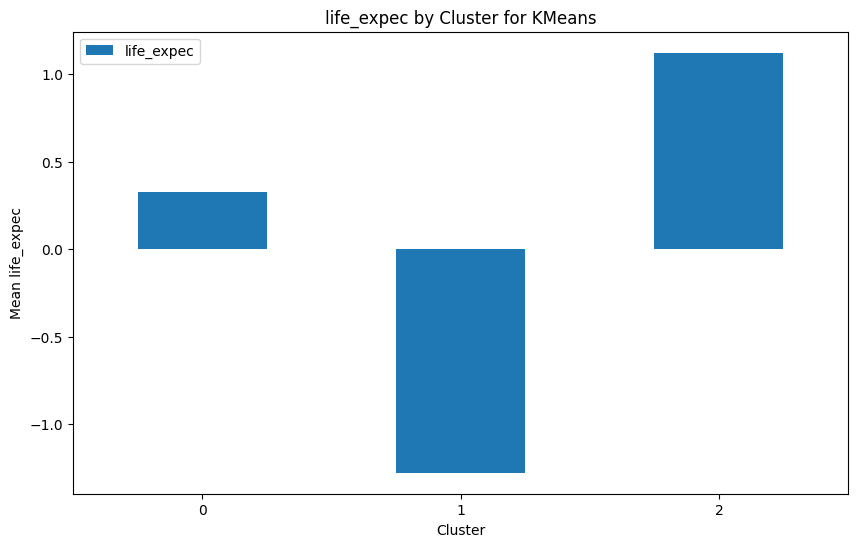

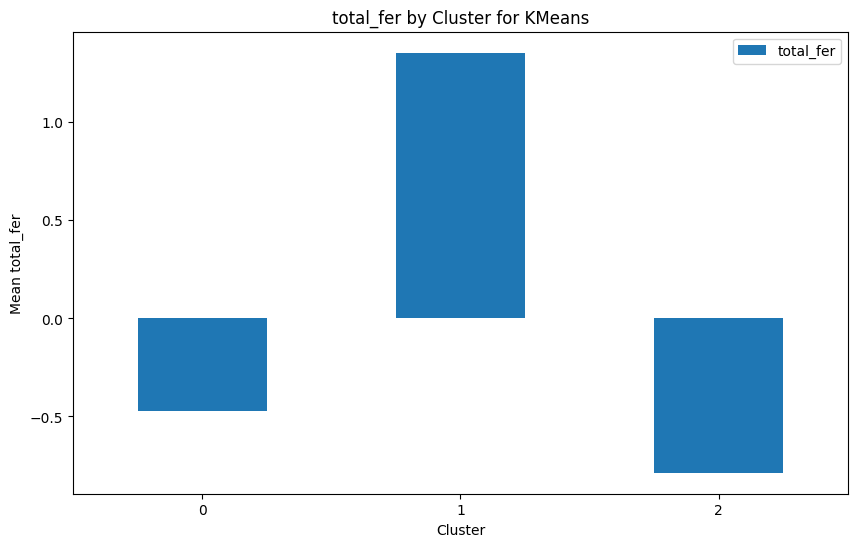

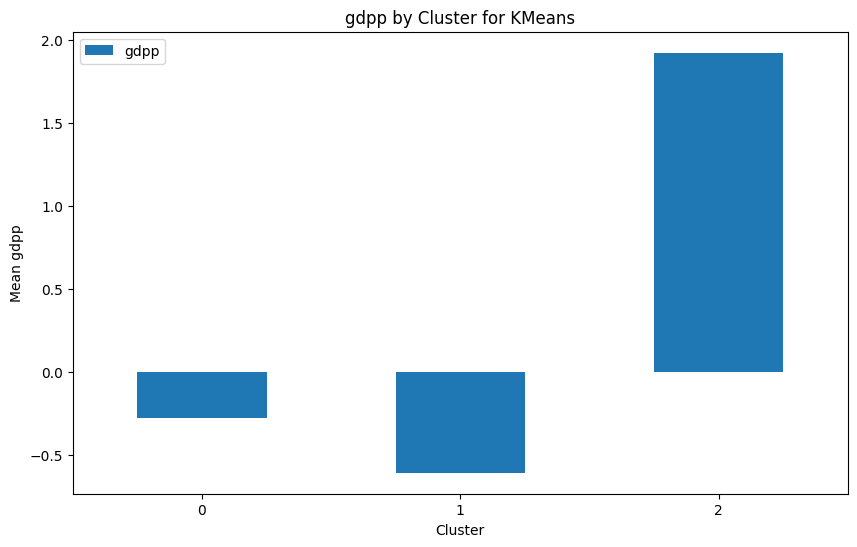

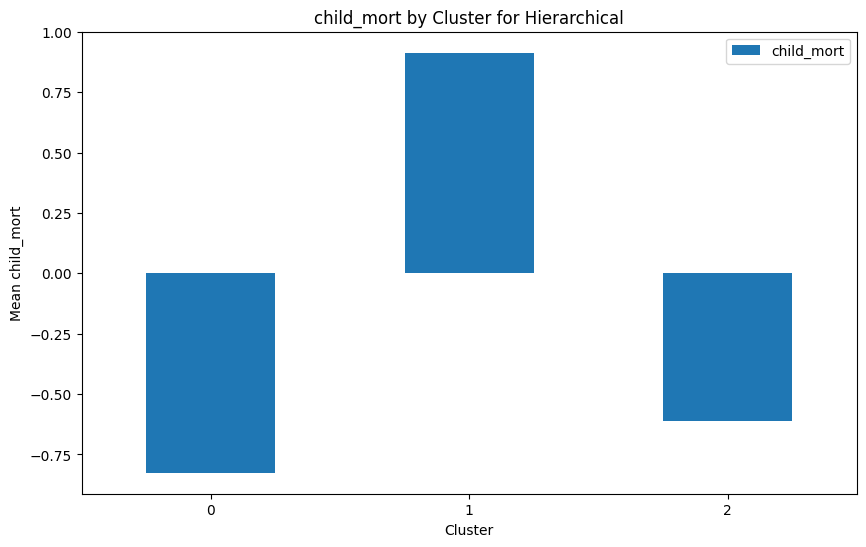

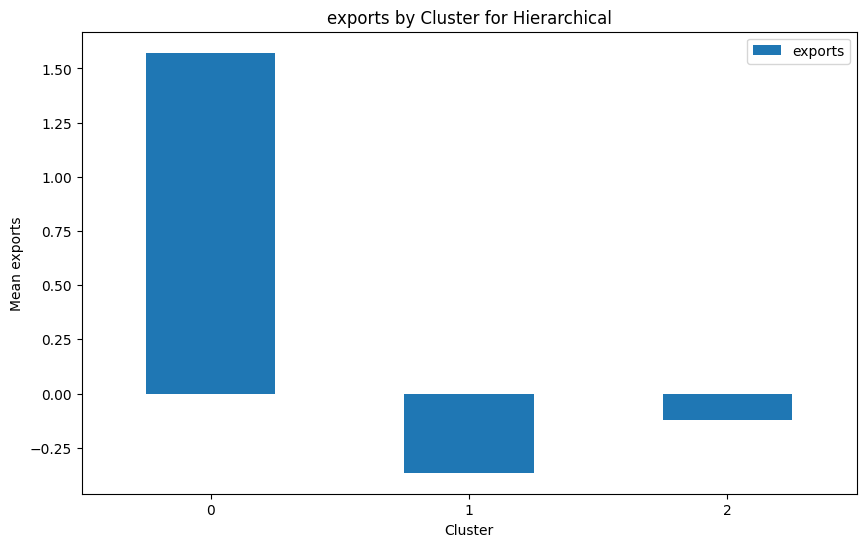

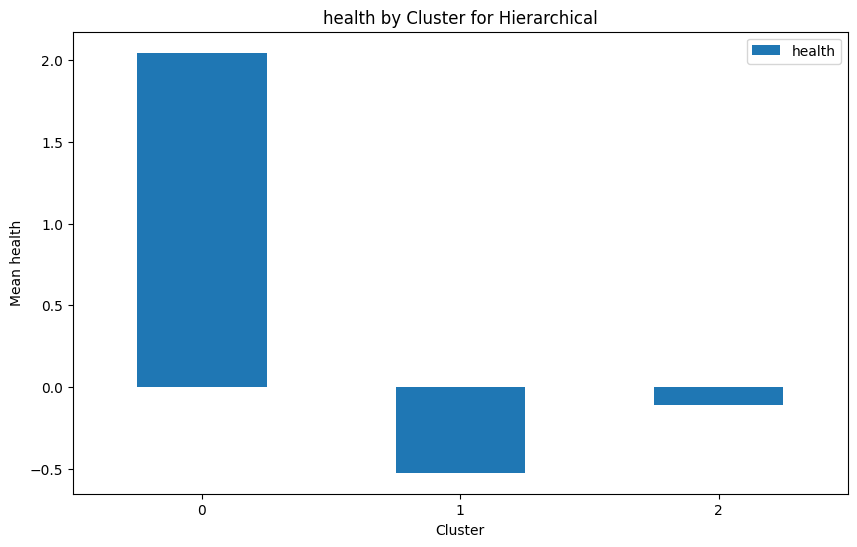

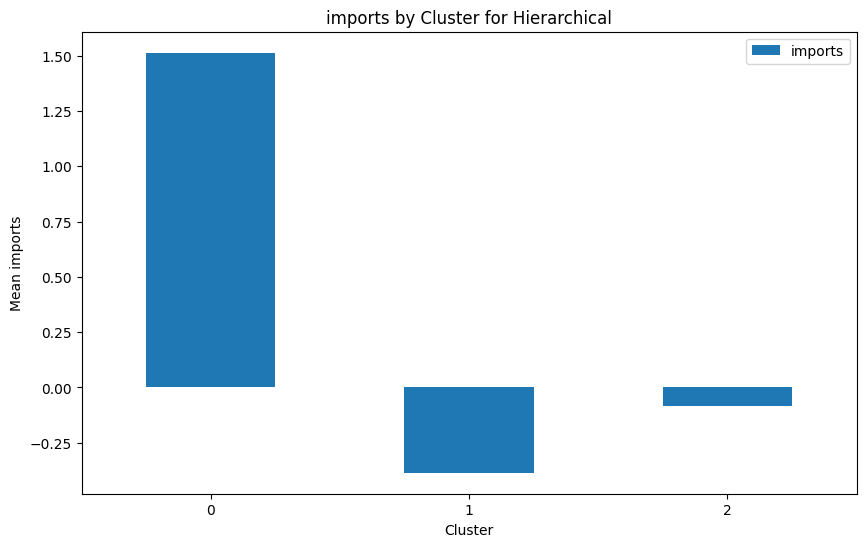

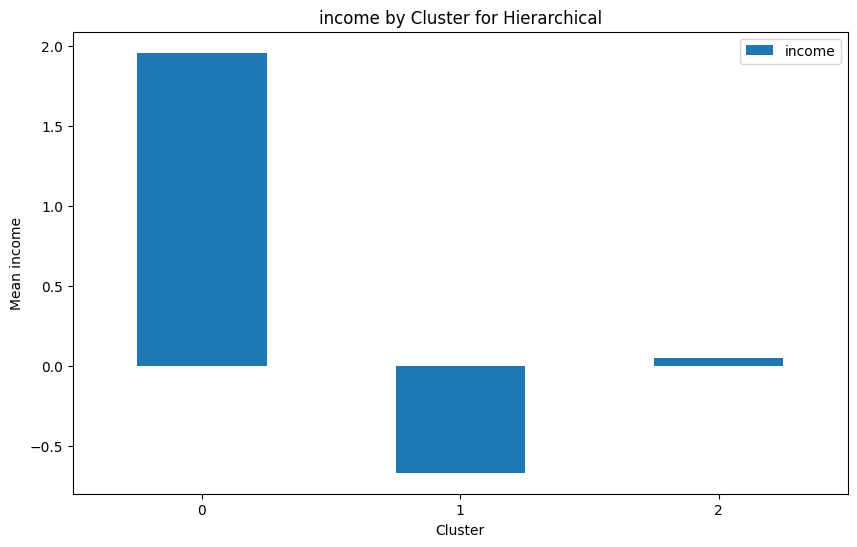

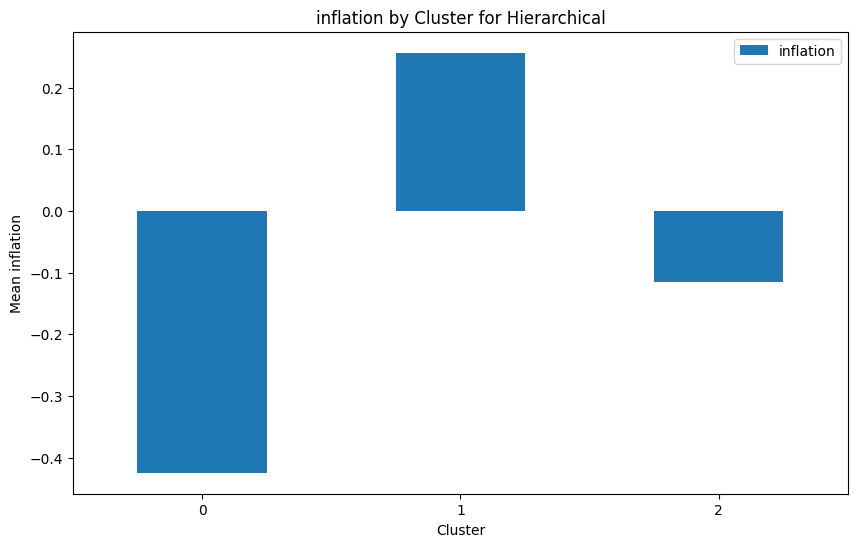

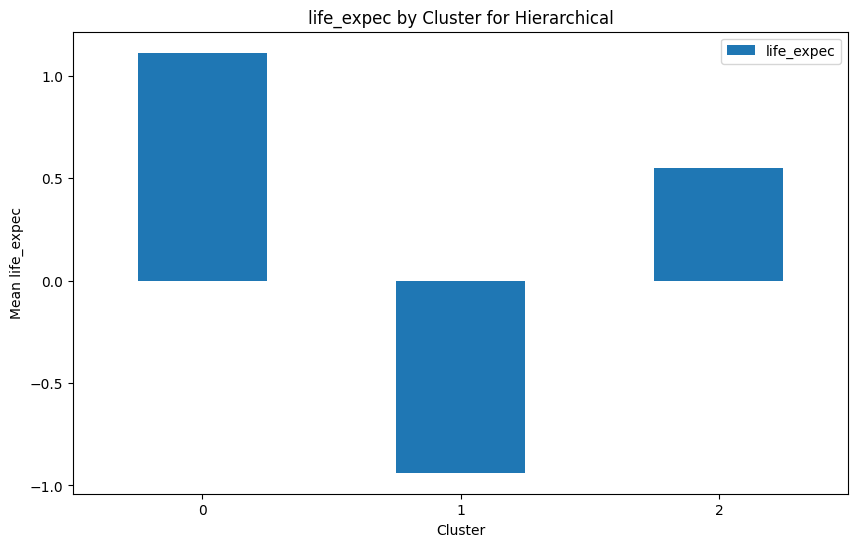

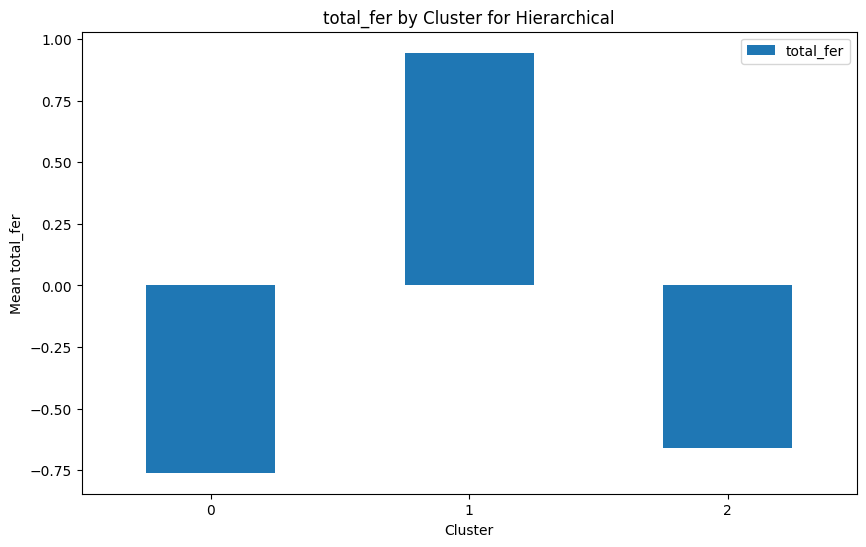

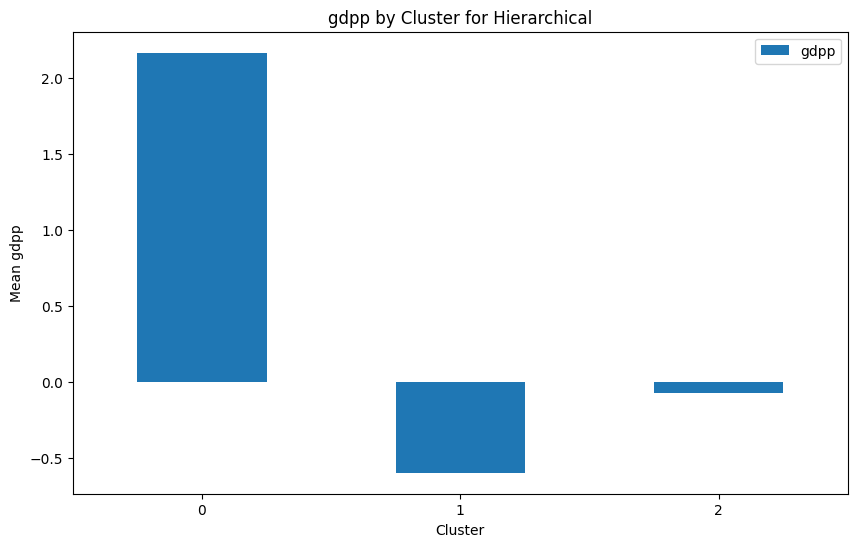

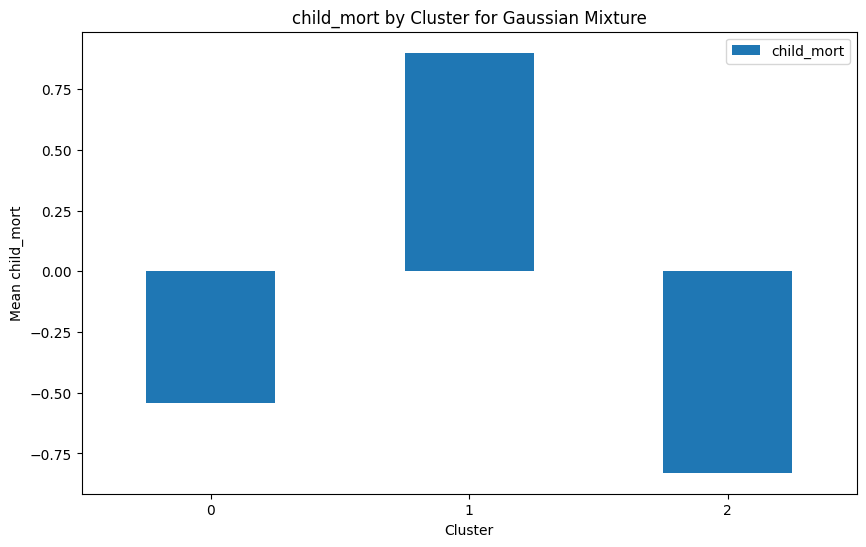

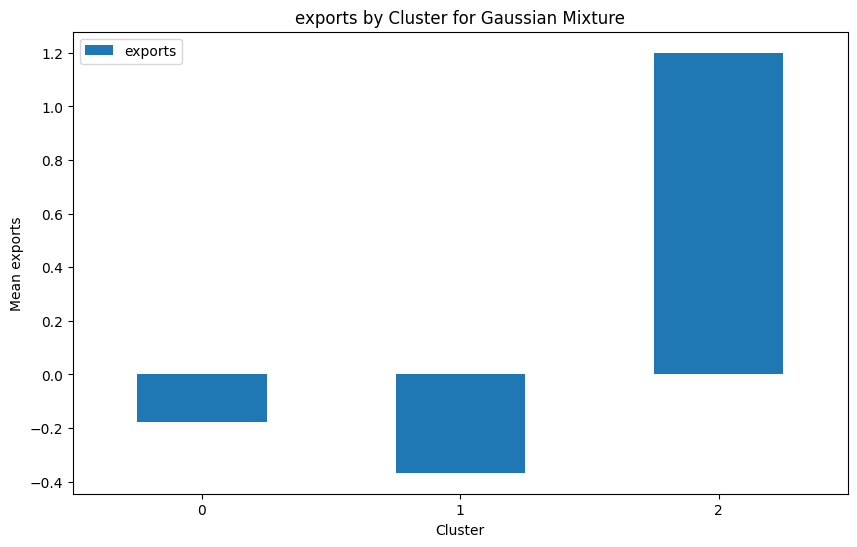

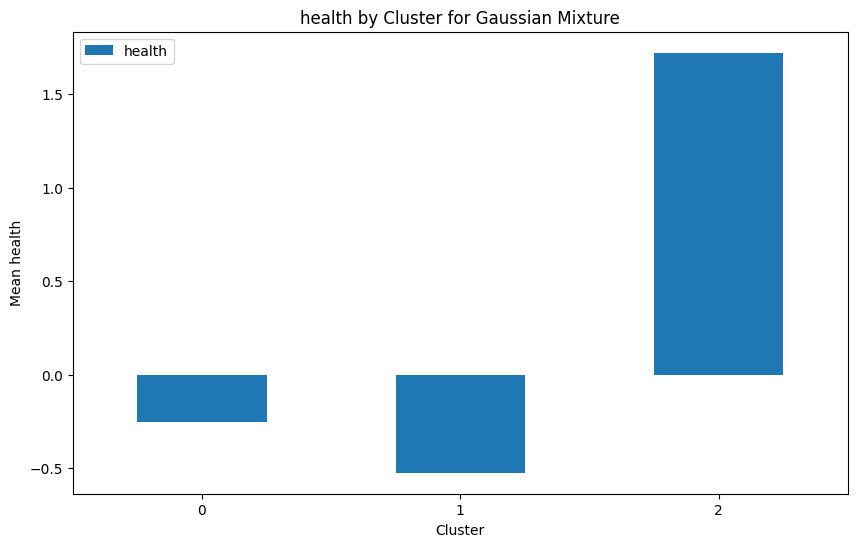

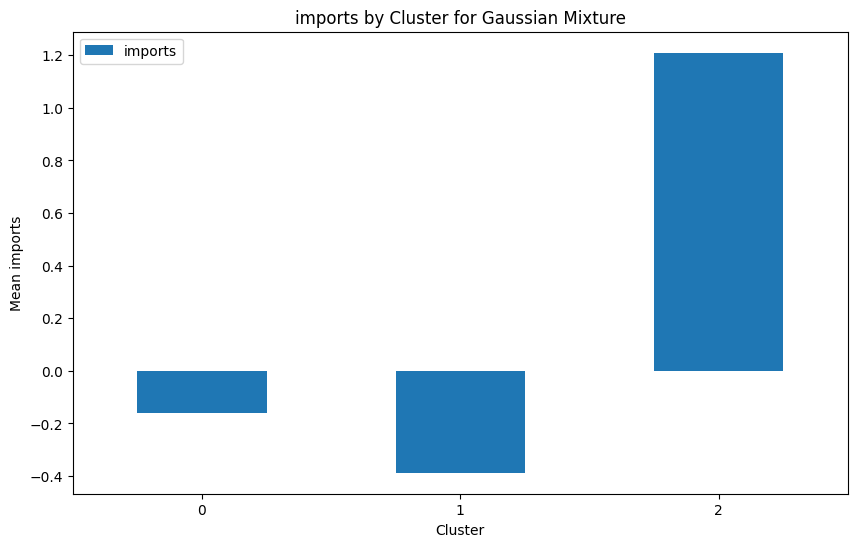

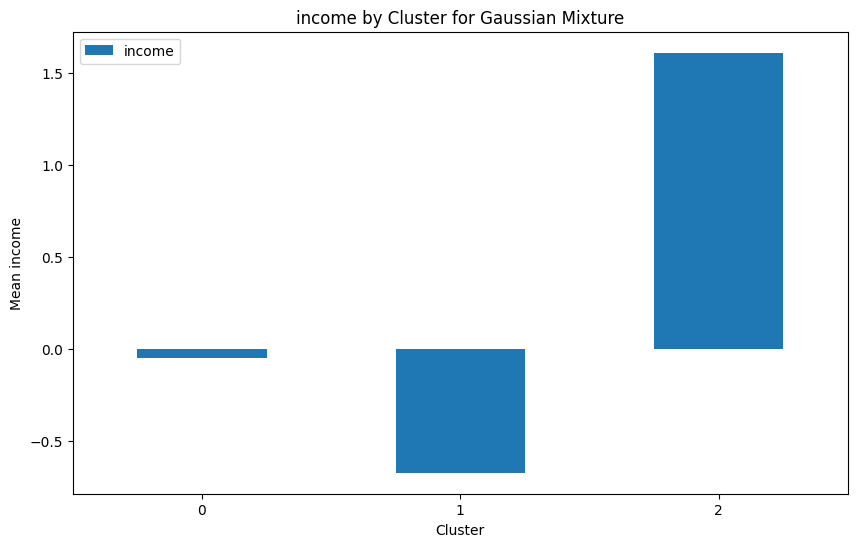

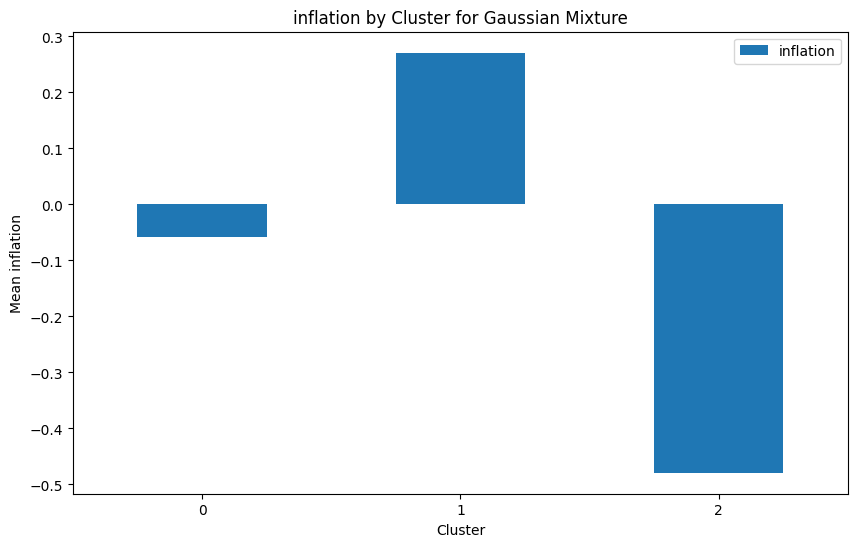

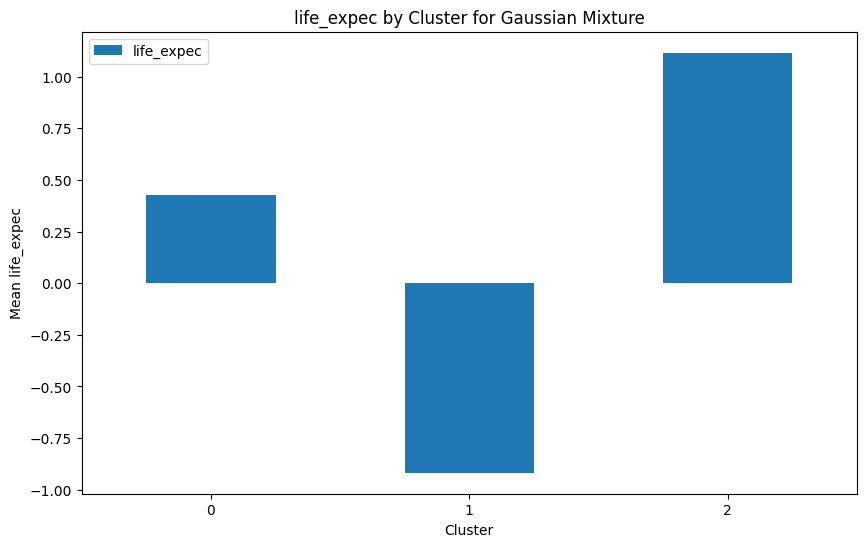

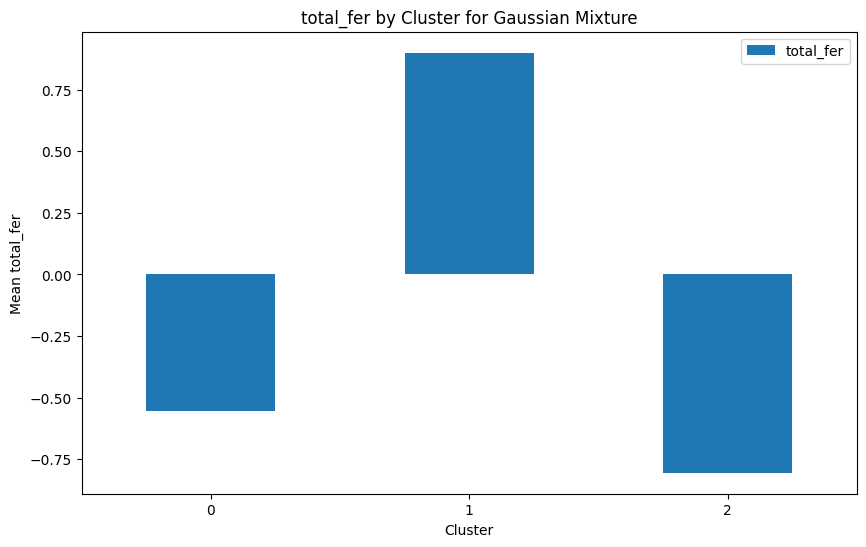

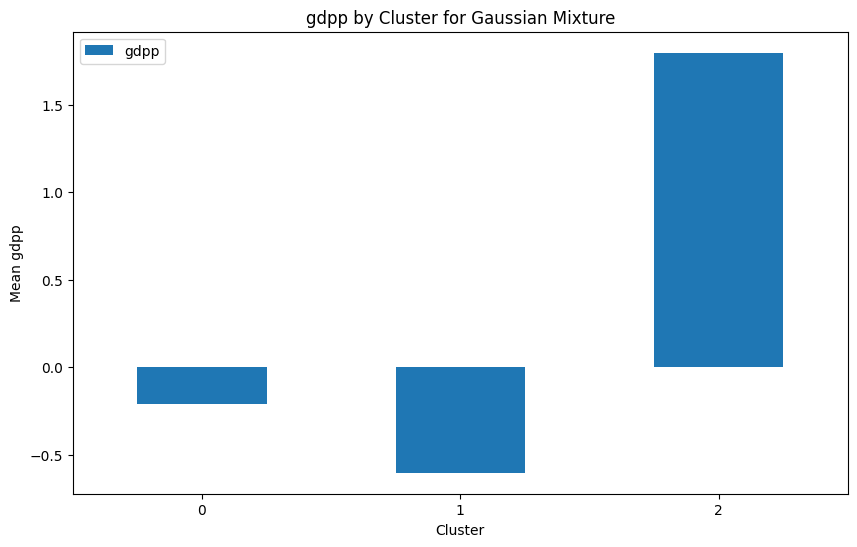

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import linear_sum_assignment
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


cluster_characteristics_list = []

# Plotting the characteristics
models_list = cluster_characteristics['Model'].unique()
features = df_scaled.columns

for model_name in models_list:
    model_data = cluster_characteristics[cluster_characteristics['Model'] == model_name]

    for feature in features:
        plt.figure(figsize=(10, 6))
        model_data[feature].plot(kind='bar', title=f'{feature} by Cluster for {model_name}', legend=True)
        plt.xlabel('Cluster')
        plt.ylabel(f'Mean {feature}')
        plt.xticks(rotation=0)
        plt.show()



##6. Ensemble Learning





In [ ]:
# Kmeans Esemble learning
from scipy.stats import mode


# Số lượng cụm
n_clusters = 3

# Tạo nhiều mô hình KMeans với các khởi tạo khác nhau
kmeans_1 = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_2 = KMeans(n_clusters=n_clusters, random_state=52)
kmeans_3 = KMeans(n_clusters=n_clusters, random_state=62)

# Lấy nhãn từ các mô hình KMeans khác nhau
kmeans_labels_1 = kmeans_1.fit_predict(df_scaled)

kmeans_labels_2 = kmeans_2.fit_predict(df_scaled)
kmeans_labels_3 = kmeans_3.fit_predict(df_scaled)

# Thu thập các nhãn từ các mô hình KMeans khác nhau
all_labels = np.array([kmeans_labels_1, kmeans_labels_2, kmeans_labels_3])

# Thực hiện biểu quyết đa số để xác định nhãn cuối cùng
final_labels, _ = mode(all_labels)

# Chuyển đổi final_labels thành một mảng 1D
final_labels = final_labels.flatten()

# Đánh giá mô hình phân cụm tập hợp KMeans
silhouette_avg = silhouette_score(df_scaled, final_labels)
calinski_harabasz_avg = calinski_harabasz_score(df_scaled, final_labels)
davies_bouldin_avg = davies_bouldin_score(df_scaled, final_labels)

# Tạo DataFrame để lưu trữ các điểm số
scores_list = [{
    'Model': 'KMeans Ensemble',
    'Silhouette Score': silhouette_avg,
    'Calinski-Harabasz Score': calinski_harabasz_avg,
    'Davies-Bouldin Score': davies_bouldin_avg
}]

scores_df = pd.DataFrame(scores_list)
print(scores_df)


             Model  Silhouette Score  Calinski-Harabasz Score  \
0  KMeans Ensemble          0.491022                93.800142   

   Davies-Bouldin Score  
0              0.903257  


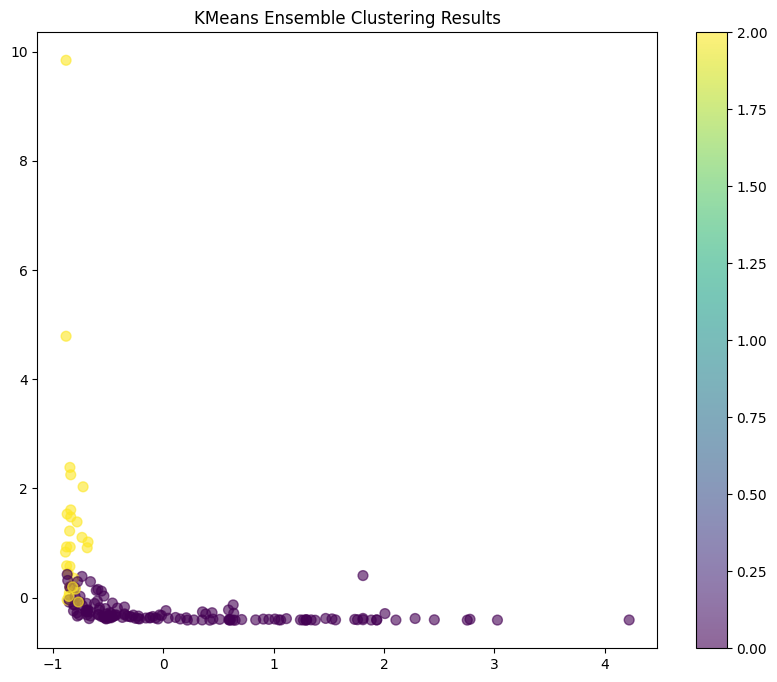

In [ ]:
def plot_clusters(X, labels, title="Clustering Results"):
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)
    plt.colorbar()
    plt.show()

# Ensure df_scaled is a numpy array for plotting
df_scaled_np = df_scaled if isinstance(df_scaled, np.ndarray) else df_scaled.values

# Plot the clustering results
plot_clusters(df_scaled_np, final_labels, title="KMeans Ensemble Clustering Results")


##7. Mô hình học sâu Autoencoder

- Xây dựng Autoencoder: Xây dựng và huấn luyện mô hình Autoencoder để học biểu diễn nén của dữ liệu.
- Lấy biểu diễn nén: Sử dụng mô hình encoder để lấy biểu diễn nén từ lớp ẩn của Autoencoder.
- Áp dụng các phương pháp phân cụm: Áp dụng các phương pháp phân cụm K-means, Hierarchical Clustering và Gaussian Mixture Model lên dữ liệu đã nén.
- Đánh giá kết quả phân cụm: Sử dụng các chỉ số Silhouette Score, Davies-Bouldin Index và Calinski-Harabasz Score để đánh giá chất lượng phân cụm.



In [ ]:
!pip install keras==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.12.0 which is incompatible.


In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam

# Định nghĩa hàm tạo autoencoder
def create_autoencoder(encoding_dim, input_dim):
    input_layer = Input(shape=(input_dim,))  # Tạo lớp đầu vào với kích thước đầu vào
    encoder = Dense(encoding_dim, activation="relu")(input_layer)  # Tạo lớp mã hóa với kích thước và hàm kích hoạt
    decoder = Dense(input_dim, activation="sigmoid")(encoder)  # Tạo lớp giải mã với hàm kích hoạt sigmoid
    autoencoder = Model(inputs=input_layer, outputs=decoder)  # Tạo mô hình autoencoder
    autoencoder.compile(optimizer=Adam(), loss='mse')  # Biên dịch mô hình với optimizer Adam và hàm loss MSE
    return autoencoder

# Thử nghiệm các giá trị của chiều, epoch và batch size
param_grid = {
    'encoding_dim': [1, 2, 3],  # Thử nghiệm các giá trị cho chiều mã hóa
    'epochs': [50, 100, 150],   # Thử nghiệm các giá trị cho số epoch
    'batch_size': [16, 32, 64]  # Thử nghiệm các giá trị cho batch size
}

# Định nghĩa input_dim dựa trên dữ liệu
input_dim = df_scaled.shape[1]

# Tạo estimator từ hàm create_autoencoder
estimator = KerasRegressor(build_fn=create_autoencoder, input_dim=input_dim)

# Sử dụng GridSearchCV để tìm siêu tham số tối ưu
grid_search = GridSearchCV(estimator=estimator,
                           param_grid=param_grid,
                           cv=3,  # Số lần gấp chéo (cross-validation)
                           verbose=1)

# Thực hiện tìm kiếm lưới
grid_search.fit(df_scaled, df_scaled)  # Fit model với dữ liệu đã chuẩn hóa

# In ra các siêu tham số tối ưu
print("Các siêu tham số tối ưu:", grid_search.best_params_)  # In ra các siêu tham số tối ưu tìm được


Streaming output truncated to the last 5000 lines.
7/7 [==============================] - 0s 7ms/step - loss: 1.1628
Epoch 14/100
7/7 [==============================] - 0s 8ms/step - loss: 1.1599
Epoch 15/100
7/7 [==============================] - 0s 6ms/step - loss: 1.1569
Epoch 16/100
7/7 [==============================] - 0s 6ms/step - loss: 1.1540
Epoch 17/100
7/7 [==============================] - 0s 11ms/step - loss: 1.1511
Epoch 18/100
7/7 [==============================] - 0s 12ms/step - loss: 1.1483
Epoch 19/100
7/7 [==============================] - 0s 12ms/step - loss: 1.1453
Epoch 20/100
7/7 [==============================] - 0s 9ms/step - loss: 1.1423
Epoch 21/100
7/7 [==============================] - 0s 12ms/step - loss: 1.1393
Epoch 22/100
7/7 [==============================] - 0s 11ms/step - loss: 1.1365
Epoch 23/100
7/7 [==============================] - 0s 11ms/step - loss: 1.1335
Epoch 24/100
7/7 [==============================] - 0s 12ms/step - loss: 1.1305
Epoch 2

2/2 [==============================] - 0s 6ms/step - loss: 1.2596
Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 1.3717
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 1.3695
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 1.3674
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 1.3653
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 1.3632
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 1.3609
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 1.3590
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 1.3566
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 1.3544
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 1.3522
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 1.3501
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 1.

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 8ms/step - loss: 1.1970
Epoch 13/100
2/2 [==============================] - 0s 11ms/step - loss: 1.1959
Epoch 14/100
2/2 [==============================] - 0s 10ms/step - loss: 1.1947
Epoch 15/100
2/2 [==============================] - 0s 8ms/step - loss: 1.1936
Epoch 16/100
2/2 [==============================] - 0s 8ms/step - loss: 1.1924
Epoch 17/100
2/2 [==============================] - 0s 9ms/step - loss: 1.1914
Epoch 18/100
2/2 [==============================] - 0s 10ms/step - loss: 1.1902
Epoch 19/100
2/2 [==============================] - 0s 7ms/step - loss: 1.1890
Epoch 20/100
2/2 [==============================] - 0s 9ms/step - loss: 1.1879
Epoch 21/100
2/2 [==============================] - 0s 10ms/step - loss: 1.1868
Epoch 22/100
2/2 [==============================] - 0s 12ms/step - loss: 1.1857
Epoch 23/100
2/2 [==============================] - 0s 9ms/step - loss: 1.1846
Epoch 24/

**Huấn luyện mô hình và thử nghiệm phân cụm**
- input_dim: Đây là số lượng đặc trưng (hoặc biến độc lập) trong dữ liệu của bạn. Trong trường hợp này, bạn đang sử dụng df_scaled là DataFrame, df_scaled.shape trả về một tuple với (số hàng, số cột). Vì bạn muốn lấy số lượng cột (số lượng đặc trưng), nên bạn sử dụng df_scaled.shape[1] để lấy số cột.
- encoding_dim: Đây là số lượng đặc trưng mà bạn muốn encoder của mạng neural network của mình biểu diễn dữ liệu đầu vào. Trong trường hợp này, bạn đang đặt encoding_dim = 3, nghĩa là bạn muốn dữ liệu của bạn được biểu diễn trong một không gian ẩn có kích thước là 3.
- input_layer = Input(shape=(input_dim,)): Đây là lớp đầu vào của mô hình. Đầu vào của autoencoder là một tensor có kích thước (input_dim,), tức là một vector với input_dim phần tử.
- encoder = Dense(encoding_dim, activation="relu")(input_layer): Đây là lớp encoder của autoencoder. Nó là một lớp dense (fully connected) với encoding_dim neuron và hàm kích hoạt ReLU. Lớp này nhận đầu vào từ input_layer và tạo ra một biểu diễn nén của dữ liệu đầu vào.
- decoder = Dense(input_dim, activation="sigmoid")(encoder): Đây là lớp decoder của autoencoder. Tương tự như encoder, nó cũng là một lớp dense với input_dim neuron và hàm kích hoạt sigmoid. Lớp này nhận đầu vào từ lớp encoder và cố gắng tái tạo dữ liệu đầu vào ban đầu từ biểu diễn nén.
-autoencoder = Model(inputs=input_layer, outputs=decoder): Cuối cùng, chúng ta kết hợp các lớp đầu vào và decoder vào một mô hình tổng thể. autoencoder này sẽ có đầu vào từ input_layer và đầu ra từ lớp decoder.


autoencoder.fit(df_scaled, df_scaled, epochs=150 , batch_size=16, shuffle=True)

Đoạn mã trên sẽ huấn luyện mô hình autoencoder trên dữ liệu df_scaled. Dưới đây là ý nghĩa của từng đối số:

- df_scaled: Là dữ liệu đầu vào và cũng là dữ liệu đầu ra mà chúng ta muốn mô hình autoencoder tái tạo.
- epochs=150: Đây là số lượng lần lặp lại mà toàn bộ tập dữ liệu sẽ được sử dụng trong quá trình huấn luyện. Trong trường hợp này, mỗi mẫu dữ liệu sẽ được sử dụng 150 lần.
- batch_size=16: Đây là số lượng mẫu dữ liệu sẽ được sử dụng trong mỗi lần cập nhật trọng số của mạng. Cụ thể, mỗi lần mạng sẽ nhận vào 16 mẫu dữ liệu và cập nhật trọng số dựa trên hiệu suất của chúng. Việc sử dụng batch giúp tăng tốc độ huấn luyện và giảm bộ nhớ cần thiết.
- shuffle=True: Điều này chỉ định rằng dữ liệu sẽ được xáo trộn sau mỗi epoch trước khi chia thành các batch. Điều này giúp mô hình học được cách tổng quát hơn và tránh trường hợp mô hình học được theo thứ tự của dữ liệu.

Khi bạn chạy đoạn mã này, mô hình autoencoder sẽ được huấn luyện trên dữ liệu đầu vào, cố gắng tái tạo chính nó trong 50 epochs, với mỗi lần cập nhật trọng số dựa trên một batch có kích thước 32 và dữ liệu được xáo trộn sau mỗi epoch.

In [ ]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import load_model

# Định nghĩa Autoencoder

input_dim = df_scaled.shape[1]
encoding_dim = 3

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation="sigmoid")(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile Autoencoder
autoencoder.compile(optimizer=Adam(), loss='mse')

# Sử dụng EarlyStopping thêm một callback
# EarlyStopping vào huấn luyện của autoencoder để ngăn chặn quá trình huấn luyện khi không có cải tiến nào
#trong việc giảm lỗi trên tập kiểm tra. Điều này giúp ngăn chặn overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Huấn luyện Autoencoder
autoencoder.fit(df_scaled, df_scaled,
                epochs=150,
                batch_size=16,
                shuffle=True,
                validation_split=0.2,
                callbacks=[early_stopping])

# Lưu mô hình autoencoder đã huấn luyện
autoencoder.save('autoencoder_model.h5')

# Tải lại mô hình autoencoder đã lưu
autoencoder = load_model('autoencoder_model.h5')

# Tạo mô hình encoder chỉ bao gồm lớp encoder
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer(index=1).output)

# Lấy biểu diễn nén từ lớp encoder
encoded_data = encoder_model.predict(df_scaled)

# Lấy biểu diễn nén từ lớp ẩn
encoder_model = Model(inputs=input_layer, outputs=encoder)
encoded_data = encoder_model.predict(df_scaled)

# Define a function to apply clustering and evaluate the results
def apply_clustering_and_evaluate(data, clustering_algorithm, algorithm_name):
    # Fit the clustering algorithm
    labels = clustering_algorithm.fit_predict(data)

    # Calculate evaluation metrics
    silhouette_avg = silhouette_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)
    calinski_harabasz = calinski_harabasz_score(data, labels)

    # Print the results
    print(f'{algorithm_name} Silhouette Score: {silhouette_avg}')
    print(f'{algorithm_name} Davies-Bouldin Index: {davies_bouldin}')
    print(f'{algorithm_name} Calinski-Harabasz Score: {calinski_harabasz}')

    return labels

# Apply K-means clustering and evaluate
print("Results after applying Autoencoder and K-means clustering:")
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = apply_clustering_and_evaluate(encoded_data, kmeans, "K-means")

# Apply Hierarchical clustering and evaluate
print("Results after applying Autoencoder and Hierarchical Clustering:")
hierarchical = AgglomerativeClustering(n_clusters=3)
labels_hierarchical = apply_clustering_and_evaluate(encoded_data, hierarchical, "Hierarchical Clustering")

# Apply Gaussian Mixture Models clustering and evaluate
print("Results after applying Autoencoder and Gaussian Mixture Models Clustering:")
gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = apply_clustering_and_evaluate(encoded_data, gmm, "Gaussian Mixture")




Epoch 1/150
9/9 [==============================] - 2s 57ms/step - loss: 1.2287 - val_loss: 1.1524
Epoch 2/150
9/9 [==============================] - 0s 22ms/step - loss: 1.2234 - val_loss: 1.1477
Epoch 3/150
9/9 [==============================] - 0s 27ms/step - loss: 1.2178 - val_loss: 1.1429
Epoch 4/150
9/9 [==============================] - 0s 12ms/step - loss: 1.2121 - val_loss: 1.1383
Epoch 5/150
9/9 [==============================] - 0s 18ms/step - loss: 1.2069 - val_loss: 1.1335
Epoch 6/150
9/9 [==============================] - 0s 16ms/step - loss: 1.2013 - val_loss: 1.1288
Epoch 7/150
9/9 [==============================] - 0s 12ms/step - loss: 1.1958 - val_loss: 1.1240
Epoch 8/150
9/9 [==============================] - 0s 13ms/step - loss: 1.1902 - val_loss: 1.1193
Epoch 9/150
9/9 [==============================] - 0s 23ms/step - loss: 1.1848 - val_loss: 1.1144
Epoch 10/150
9/9 [==============================] - 0s 21ms/step - loss: 1.1792 - val_loss: 1.1096
Epoch 11/150
9/9 [=

Kết quả sau khi áp dụng Autoencoder và K-means clustering:
Kết quả sau khi áp dụng Autoencoder và Hierarchical Clustering:
Kết quả sau khi áp dụng Autoencoder và Gaussian Mixture Models Clustering:


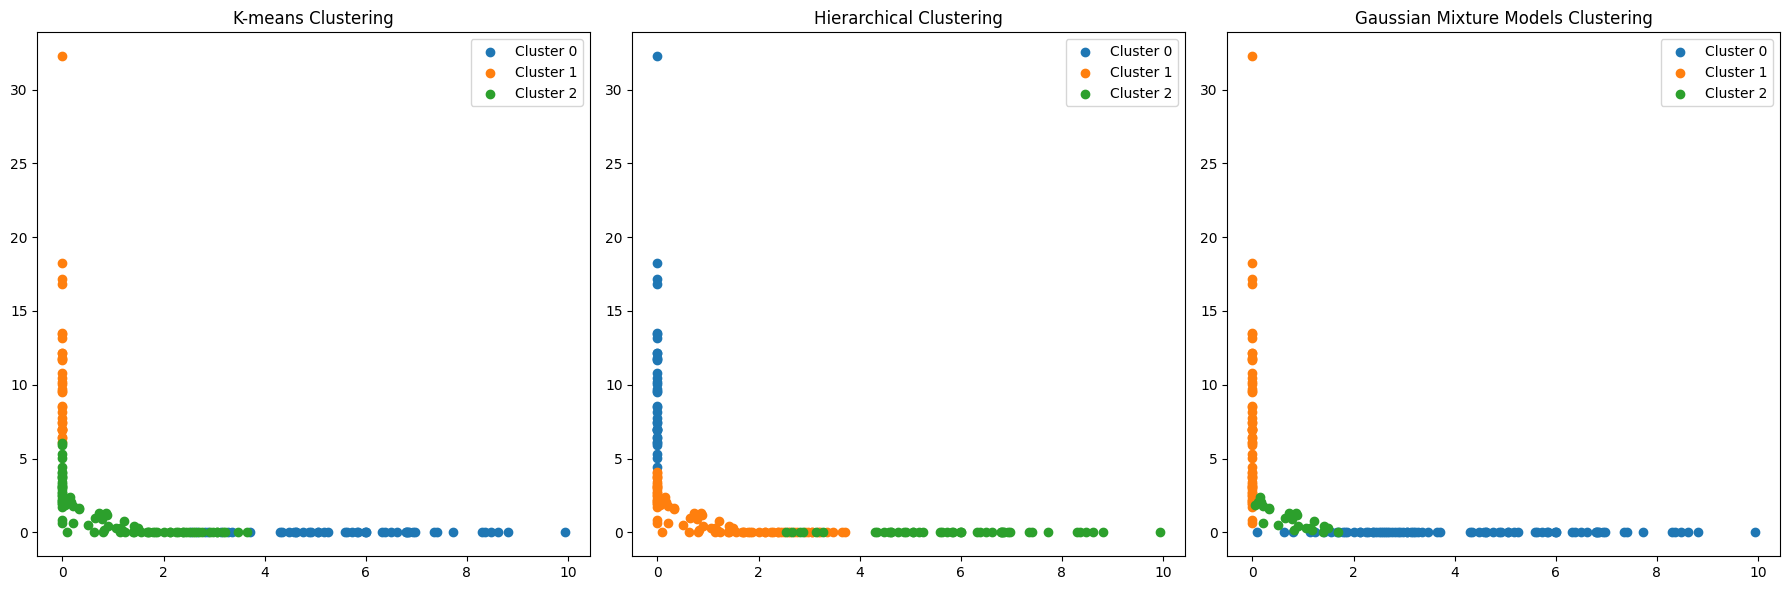

In [ ]:
def plot_clustering_deep_horizontal(data, labels, title, ax):
    unique_labels = np.unique(labels)
    for label in unique_labels:
        ax.scatter(data[labels == label, 1], data[labels == label, 0], label=f'Cluster {label}')
    ax.set_title(title)
    ax.legend()

# Plotting results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

print("Kết quả sau khi áp dụng Autoencoder và K-means clustering:")
plot_clustering_deep_horizontal(encoded_data, labels_kmeans, 'K-means Clustering', axes[0])

print("Kết quả sau khi áp dụng Autoencoder và Hierarchical Clustering:")
plot_clustering_deep_horizontal(encoded_data, labels_hierarchical, 'Hierarchical Clustering', axes[1])

print("Kết quả sau khi áp dụng Autoencoder và Gaussian Mixture Models Clustering:")
plot_clustering_deep_horizontal(encoded_data, labels_gmm, 'Gaussian Mixture Models Clustering', axes[2])

plt.tight_layout()
plt.show()
